# Exploring Patterns and Predictors in Patient Data to Uncover the Secrets of Sepsis Occurance. 

# Intro

## General

In the realm of healthcare, understanding the complex dynamics behind the occurrence of life-threatening conditions is of paramount importance. Sepsis, a potentially fatal condition resulting from the body's extreme response to an infection, remains a major challenge for healthcare providers worldwide. Unraveling the secrets of sepsis occurrence can lead to improved early detection, timely interventions, and ultimately, better patient outcomes.

This project aims to delve into the vast pool of patient data, harnessing the power of data analysis and machine learning, to explore patterns and predictors associated with sepsis occurrence. By leveraging advanced computational techniques and drawing insights from comprehensive patient records, this research endeavor seeks to uncover hidden correlations, risk factors, and potential early warning signs that can facilitate earlier diagnosis and intervention.


## Hypothesis

##### -  Hypothesis 1: Patients with higher body mass index (BMI) values (M11) have a lower risk of sepsis.

- Null Hypothesis: There is no association between body mass index (BMI) values (M11) and the risk of sepsis.

- Alternate Hypothesis: Patients with higher body mass index (BMI) values (M11) have a lower risk of sepsis.

Justification: Obesity has been associated with a dampened immune response, potentially leading to a decreased risk of developing sepsis.

##### -  Hypothesis 2:  Older patients are more likely to develop sepsis compared to younger patients.

- Null Hypothesis: There is no difference in the likelihood of developing sepsis between older and younger patients.

- Alternate Hypothesis: Older patients are more likely to develop sepsis compared to younger patients.

Justification: Advanced age is a known risk factor for sepsis, as the immune system weakens with age and may be less able to mount an effective response to infections.

##### - Hypothesis 3: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.

- Null Hypothesis: There is no association between higher plasma glucose levels (PRG) and the risk of developing sepsis.

- Alternate Hypothesis: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.

Justification: Elevated glucose levels have been linked to impaired immune function and increased susceptibility to infections, including sepsis.




# Setup

## Importation

Here is the section to import all the packages/libraries that will be used through this notebook.

In [57]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import skew

# Data Splitting and Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
import pickle

# Saving Model
from joblib import dump

# Others
import shap
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

# Set seaborn defaults and suppress warnings
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

# Data Loading

Here is the section to load the datasets (train, eval, test) and the additional files

In [7]:
test = pd.read_csv("../Data/Patients_Files_Test.csv")

train = pd.read_csv("../Data/Patients_Files_Train.csv")

In [8]:
# Print the first few rows of the DataFrame
print(train.head())


          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive


- ID: Unique number to represent patient ID

- PRG: Plasma glucose

- PL: Blood Work Result-1 (mu U/ml)

- PR: Blood Pressure (mm Hg)

- SK: Blood Work Result-2 (mm)

- TS: Blood Work Result-3 (mu U/ml)

- M11: Body mass index (weight in kg/(height in m)^2

- BD2: Blood Work Result-4 (mu U/ml)

- Age	: patients age (years)

- Insurance: If a patient holds a valid insurance card

- Sepssis; Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [9]:

# Print the first few rows of the DataFrame
print(test.head())

          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0


# Exploratory Data Analysis: EDA

Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [10]:
#Check dataset dimension 
print("Number of rows for Train data:", train.shape[0])
print("Number of columns for Train data:", train.shape[1])


Number of rows for Train data: 599
Number of columns for Train data: 11


In [11]:
#Check dataset dimension 
print("Number of rows for Test Data:", test.shape[0])
print("Number of columns for Test Data:", train.shape[1])

Number of rows for Test Data: 169
Number of columns for Test Data: 11


In [12]:
#Explore the summary statistics of numerical columns:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


###### PRG

- Count: 599
- Mean: 3.82
- Standard Deviation: 3.36
- Range: 0 to 17

###### PL

- Count: 599
- Mean: 120.15
- Standard Deviation: 32.68
- Range: 0 to 198

###### PR

- Count: 599
- Mean: 68.73
- Standard Deviation: 19.34
- Range: 0 to 122

###### SK

- Count: 599
- Mean: 20.56
- Standard Deviation: 16.02
- Range: 0 to 99

###### TS

- Count: 599
- Mean: 79.46
- Standard Deviation: 116.58
- Range: 0 to 846

###### M11

- Count: 599
- Mean: 31.92
- Standard Deviation: 8.01
- Range: 0 to 67.1

###### BD2

- Count: 599
- Mean: 0.48
- Standard Deviation: 0.34
- Range: 0.078 to 2.42

###### Age

- Count: 599
- Mean: 33.29
- Standard Deviation: 11.83
- Range: 21 to 81

###### Insurance

- Count: 599
- Proportion with Insurance: 0.686 (68.6%)


In [13]:
#Explore the summary statistics of numerical columns:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
PL,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
PR,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
SK,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
TS,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
M11,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
BD2,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


In [14]:
train.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

In [15]:
test.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
dtype: object

In [16]:
df = train.copy()

## Univariate Analysis 

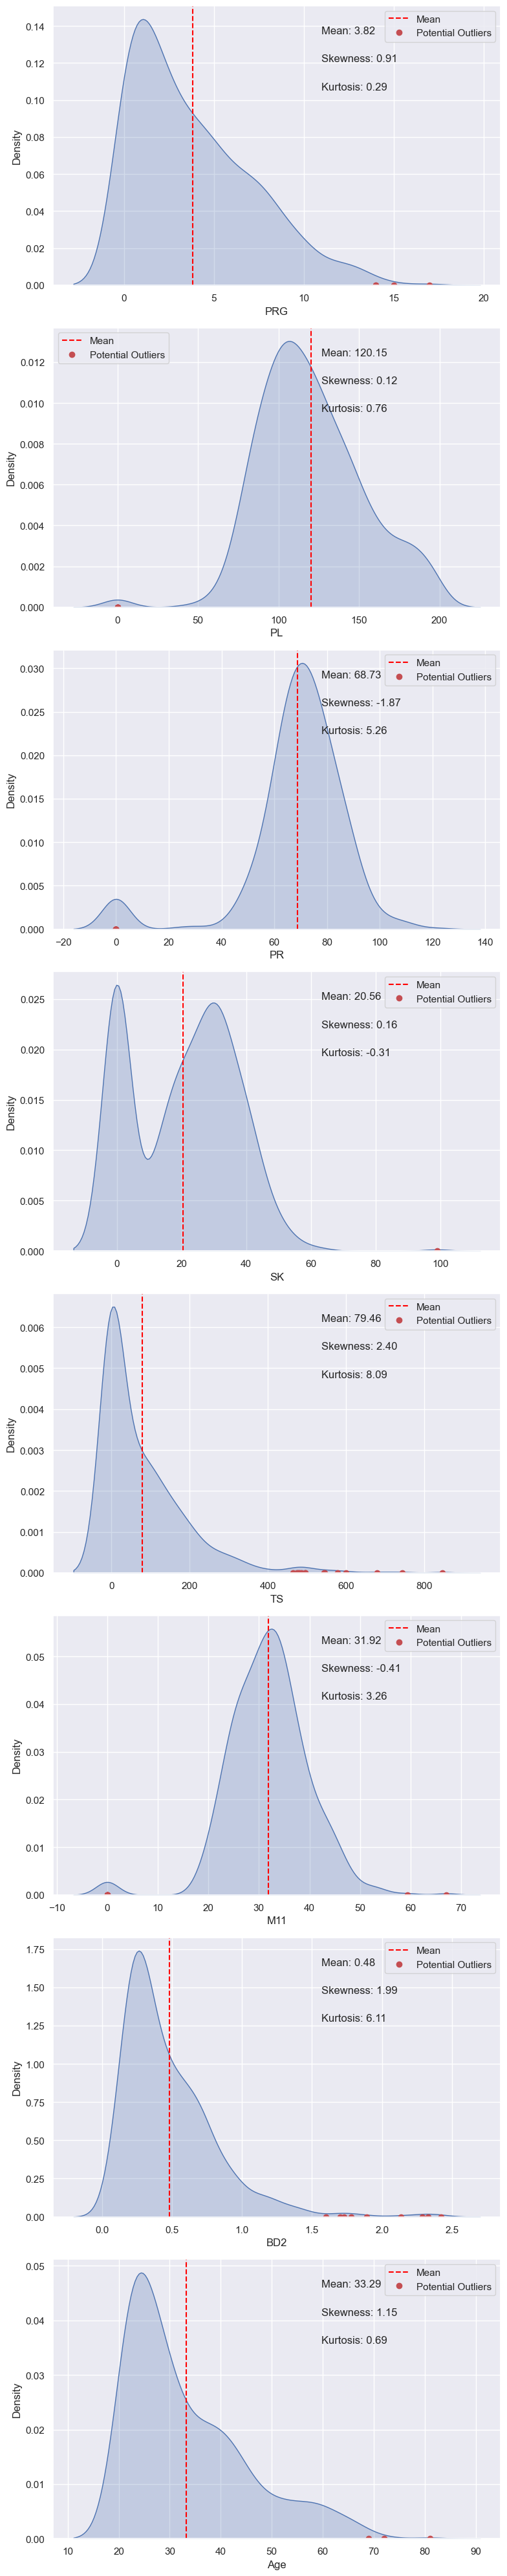

In [17]:
# Select columns to plot
cols_to_plot = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols_to_plot), figsize=(8, 40))
for i, col in enumerate(cols_to_plot):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df[col].mean()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    
    # Add red dots to indicate potential outliers
    outliers = df[(df[col] > mean_val + 3 * df[col].std()) | (df[col] < mean_val - 3 * df[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')
    
    # Add legend
    axes[i].legend()
    
plt.tight_layout()
plt.show()


Based on the KDE plot analysis of the PRG variable, it appears that the distribution is positively skewed, suggesting the presence of some higher values. The distribution is also platykurtic, indicating a flatter peak and lighter tails compared to a normal distribution.

Based on the KDE plot analysis of the PL variable, it appears that the distribution is approximately symmetric, with a mean value of 120.15. The distribution is mesokurtic, suggesting a similar shape to a normal distribution.

The kde plot suggests that the blood pressure distribution is negatively skewed and has a more peaked shape with possible outliers.

The kde plot suggests that the distribution of blood work result 2 is slightly positively skewed and has a flatter shape.This suggests that the distribution has fewer outliers or extreme values.

The kde plot suggests that the distribution of TS (blood work result 3) is positively skewed and has a more peaked shape with heavier tails.This means that the tail of the distribution is extended to the right, indicating a higher frequency of lower values compared to higher values.This suggests that the distribution has more outliers or extreme values.

The kde plot suggests that the distribution of body mass index is slightly negatively skewed and has a more peaked shape with heavier tails.This means that the tail of the distribution is extended to the left, indicating a higher frequency of higher values compared to lower values. This suggests that the distribution has more outliers or extreme values.
The kde plot indicates a positively skewed distribution for the blood work result with a more peaked shape and heavier tails.This indicates a higher frequency of extreme values or outliers.This means that the tail of the distribution is extended to the right, suggesting a higher frequency of lower values compared to higher values.

The kde plot indicates a positively skewed distribution of age, with a higher frequency of younger individuals. This indicates a more uniform spread of values without significant outliers or extreme values.This suggests that the tail of the distribution is extended to the right, indicating a higher frequency of younger individuals compared to older individuals.

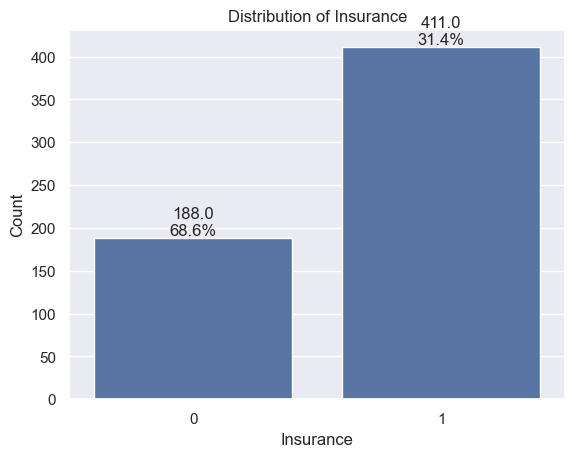

In [18]:
# Count plot for "Insurance"
sns.countplot(data=df, x='Insurance')

# Set labels
plt.xlabel('Insurance')
plt.ylabel('Count')

# Set title
plt.title('Distribution of Insurance')

# Calculate percentage distribution
total = len(df['Insurance'])
percentages = df['Insurance'].value_counts(normalize=True) * 100

# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.show()


##### Outlier Analysis 

Number of outliers in PRG: 4


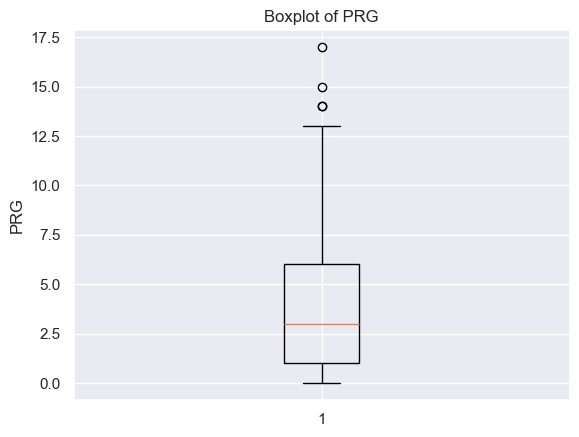

Number of outliers in PL: 0


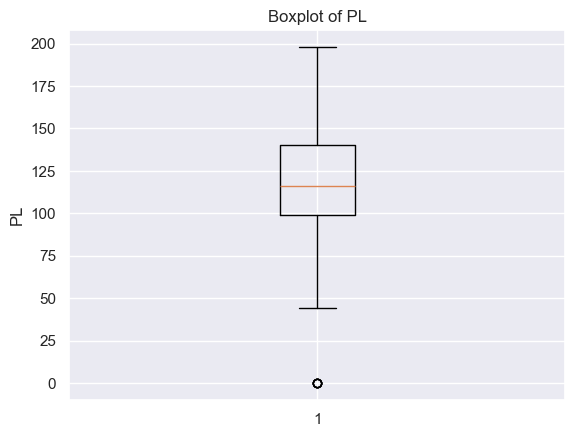

Number of outliers in PR: 6


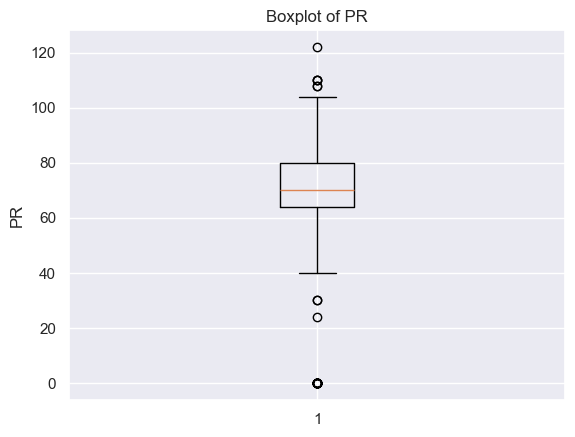

Number of outliers in SK: 1


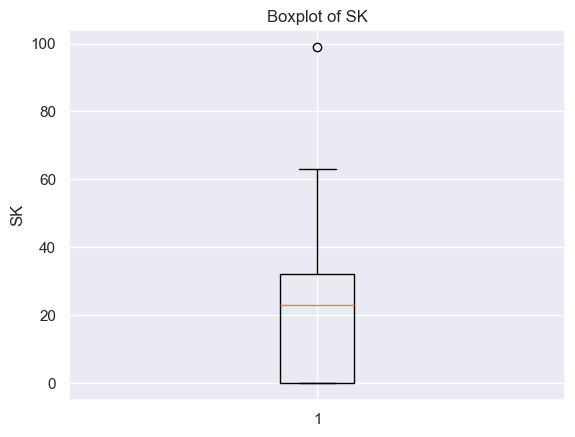

Number of outliers in TS: 28


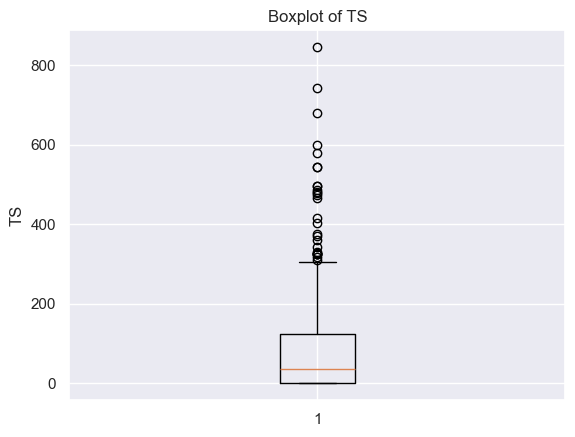

Number of outliers in M11: 7


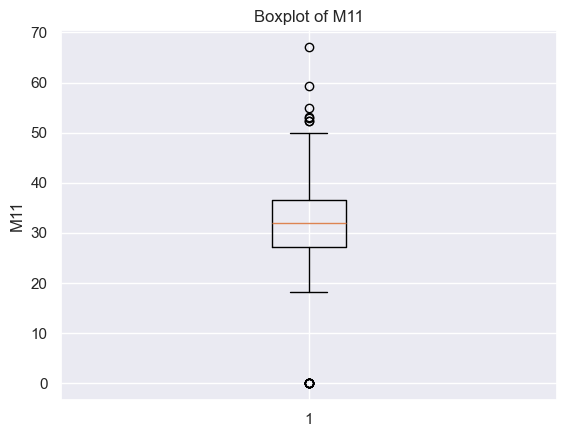

Number of outliers in BD2: 19


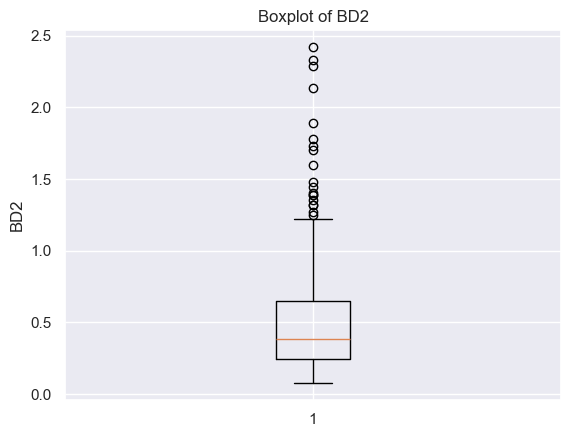

Number of outliers in Age: 12


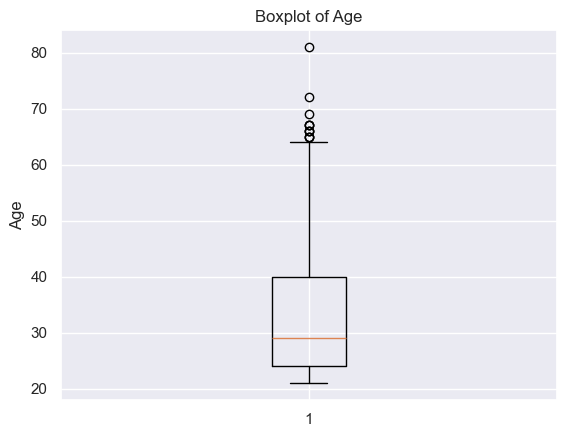

Number of outliers in Insurance: 0


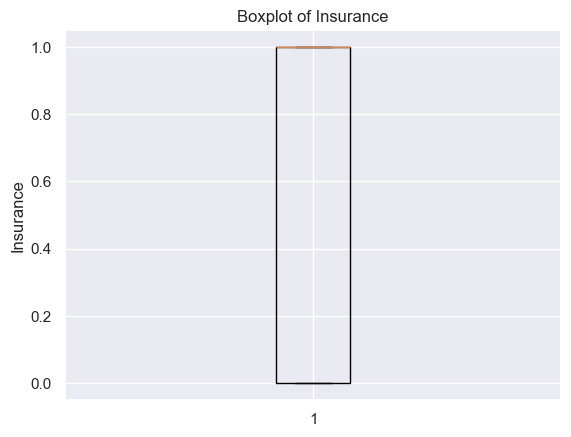

In [19]:
# Select numerical columns
numerical_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

# Iterate over each numerical column
for col in numerical_cols:
    # Create a box plot
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    # Get the outliers
    outliers = df[df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))]  # Adjust the outlier threshold if needed

    # Print the number of outliers
    num_outliers = len(outliers)
    print(f"Number of outliers in {col}: {num_outliers}")

    # Show the plot
    plt.show()


## Bivariate Analysis 

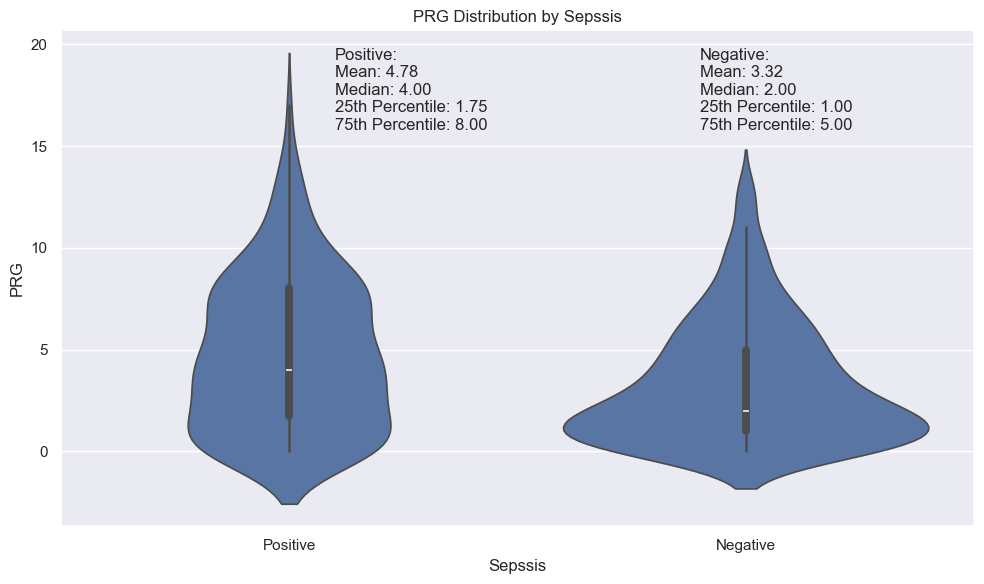

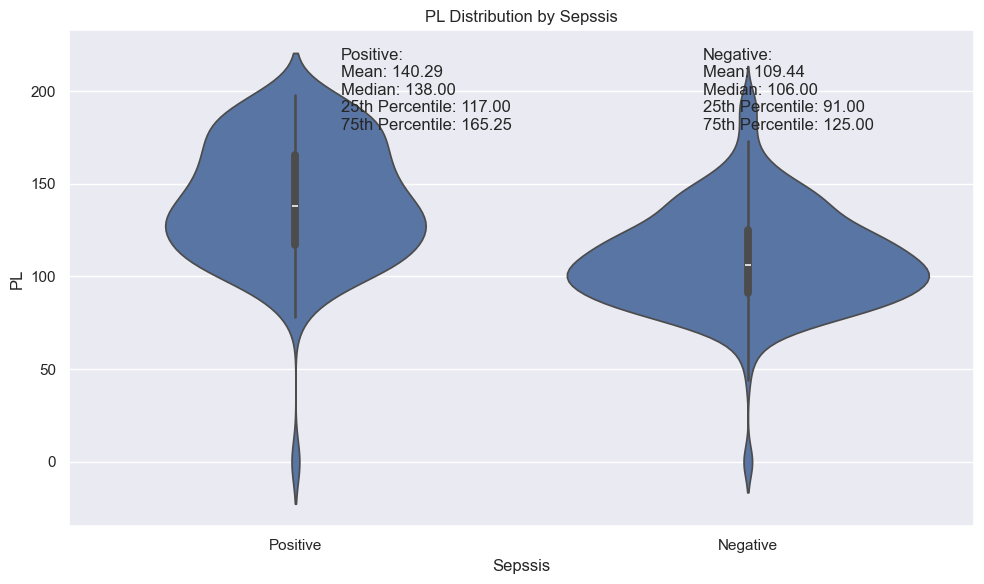

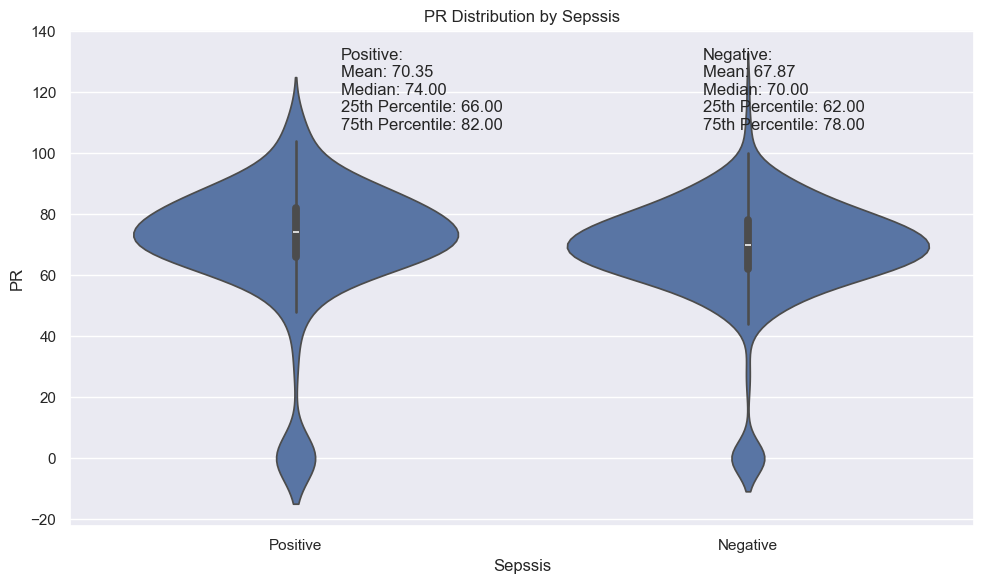

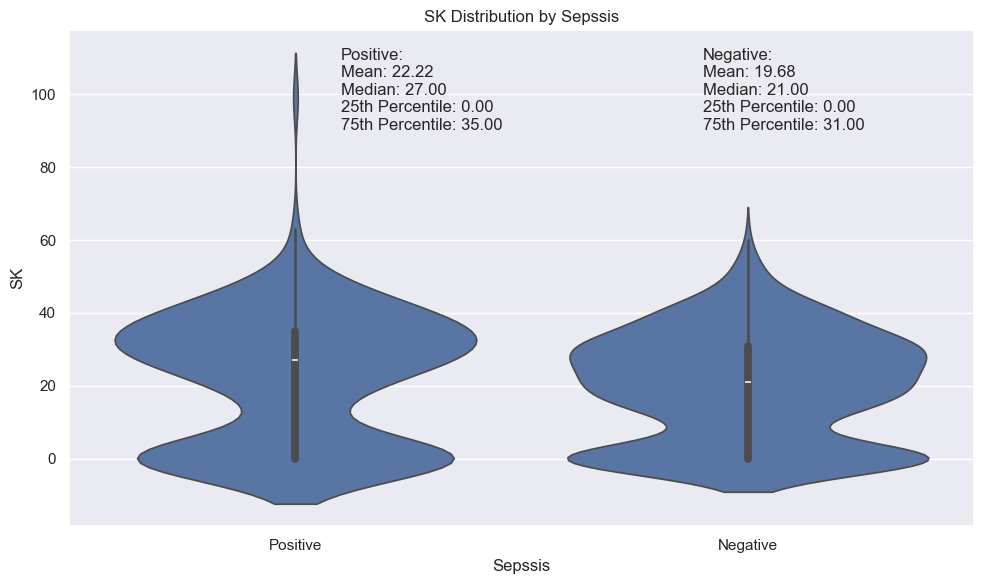

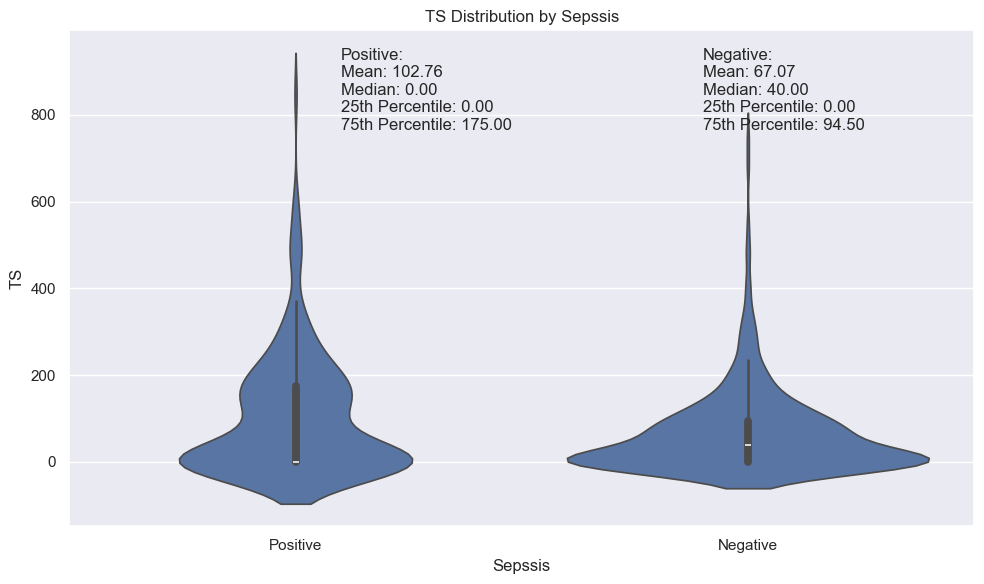

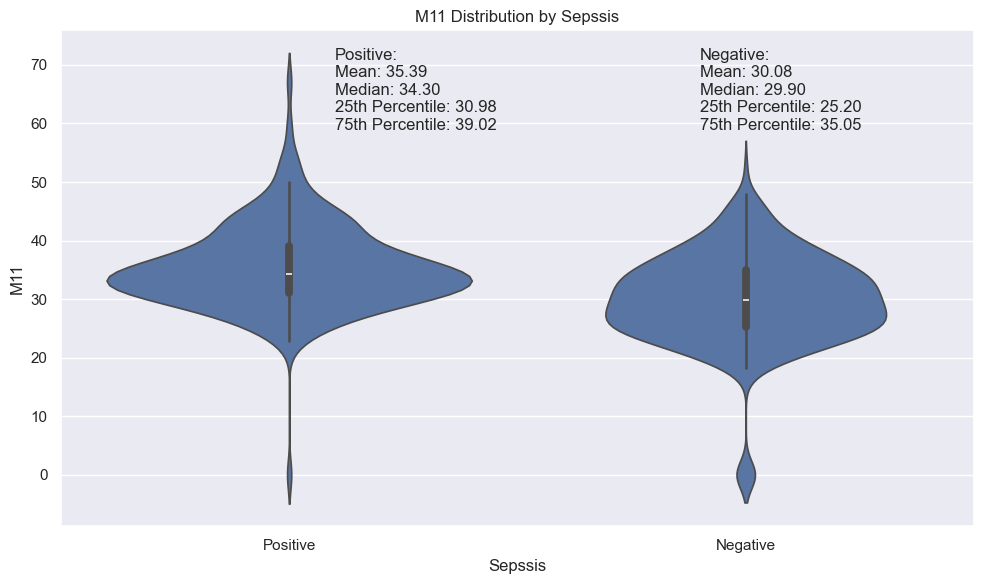

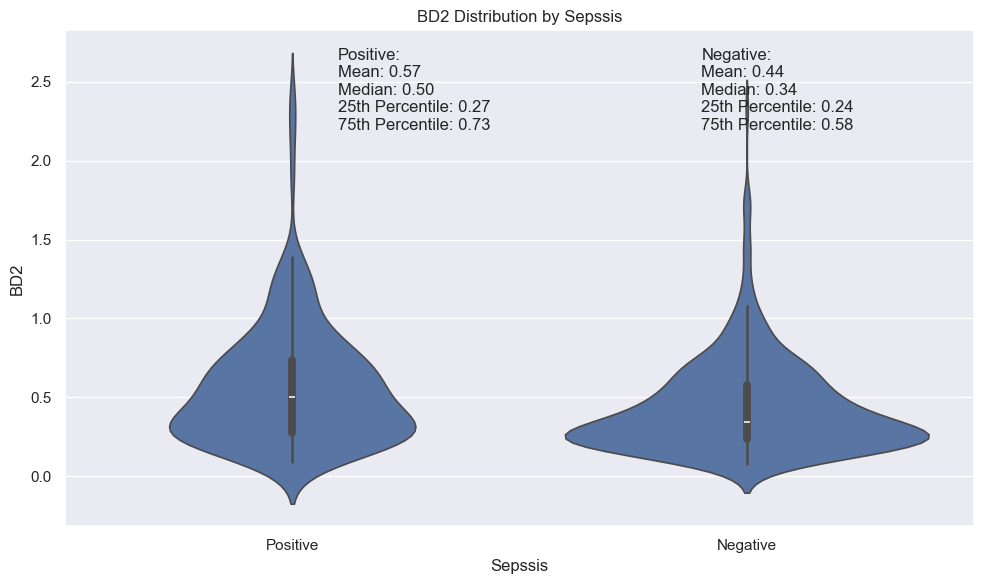

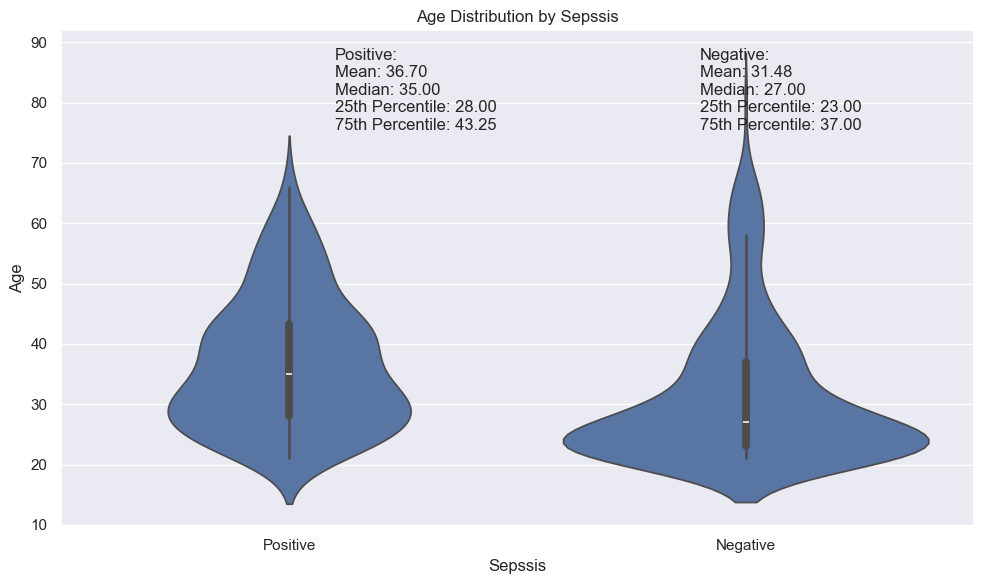

In [20]:
# Numerical Variables - Violin plots with statistics
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Sepssis', y=var)
    plt.xlabel('Sepssis')
    plt.ylabel(var)
    plt.title(f'{var} Distribution by Sepssis')
    
    # Calculate statistics
    positive_vals = df[df['Sepssis'] == 'Positive'][var]
    negative_vals = df[df['Sepssis'] == 'Negative'][var]
    stat_dict = {
        'Positive': {
            'Mean': np.mean(positive_vals),
            'Median': np.median(positive_vals),
            '25th Percentile': np.percentile(positive_vals, 25),
            '75th Percentile': np.percentile(positive_vals, 75)
        },
        'Negative': {
            'Mean': np.mean(negative_vals),
            'Median': np.median(negative_vals),
            '25th Percentile': np.percentile(negative_vals, 25),
            '75th Percentile': np.percentile(negative_vals, 75)
        }
    }
    
    # Add statistics as text annotations
    plt.text(0.30, 0.8, f"Positive:\nMean: {stat_dict['Positive']['Mean']:.2f}\nMedian: {stat_dict['Positive']['Median']:.2f}\n25th Percentile: {stat_dict['Positive']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Positive']['75th Percentile']:.2f}", transform=plt.gca().transAxes)
    plt.text(0.70, 0.8, f"Negative:\nMean: {stat_dict['Negative']['Mean']:.2f}\nMedian: {stat_dict['Negative']['Median']:.2f}\n25th Percentile: {stat_dict['Negative']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Negative']['75th Percentile']:.2f}", transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()



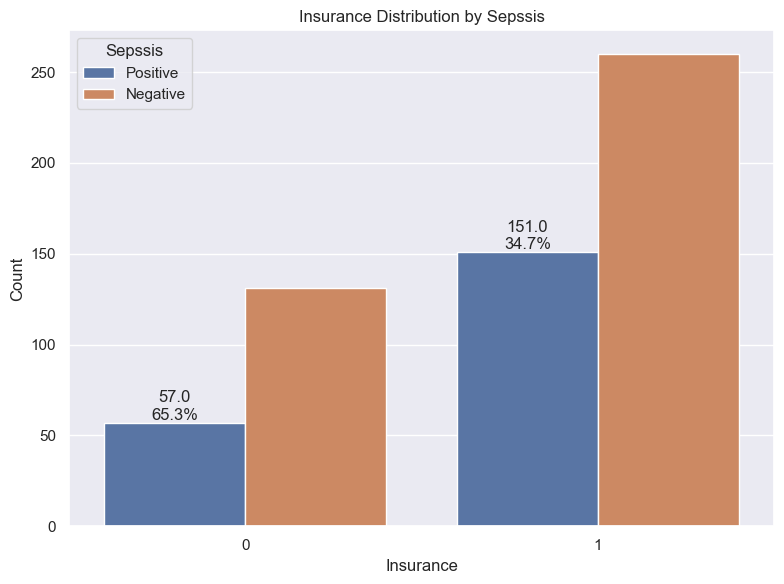

In [21]:
# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='Sepssis')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepssis')

    # Calculate percentage distribution
    total = len(df['Sepssis'])
    percentages = df['Sepssis'].value_counts(normalize=True) * 100

    # Add data labels and percentage annotations
    for p, percentage in zip(plt.gca().patches, percentages):
        count = p.get_height()
        percentage_label = f'{percentage:.1f}%'
        plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [22]:
# Encoding the target variable
df['Sepssis_Encoded'] = df['Sepssis'].map({'Negative': 0, 'Positive': 1})

# Calculate correlation coefficients
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']
correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()

# Print correlation coefficients
for var in numerical_vars:
    correlation = correlations.loc[var, 'Sepssis_Encoded']
    print(f"Pearson correlation between 'Sepssis_Encoded' and '{var}': {correlation:.2f}")


Pearson correlation between 'Sepssis_Encoded' and 'PRG': 0.21
Pearson correlation between 'Sepssis_Encoded' and 'PL': 0.45
Pearson correlation between 'Sepssis_Encoded' and 'PR': 0.06
Pearson correlation between 'Sepssis_Encoded' and 'SK': 0.08
Pearson correlation between 'Sepssis_Encoded' and 'TS': 0.15
Pearson correlation between 'Sepssis_Encoded' and 'M11': 0.32
Pearson correlation between 'Sepssis_Encoded' and 'BD2': 0.18
Pearson correlation between 'Sepssis_Encoded' and 'Age': 0.21
Pearson correlation between 'Sepssis_Encoded' and 'Insurance': 0.06


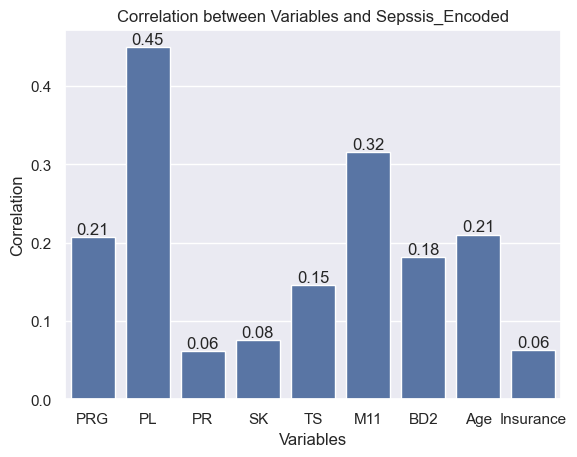

In [23]:
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']
correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()

# Get correlation values
correlation_values = correlations.loc[numerical_vars, 'Sepssis_Encoded']

# Create bar plot using Seaborn
sns.barplot(x=numerical_vars, y=correlation_values)

# Add data labels to the bar plot
for i, val in enumerate(correlation_values):
    plt.text(i, val, round(val, 2), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation between Variables and Sepssis_Encoded')

# Show the plot
plt.show()


Let's analyze the correlations between the 'Sepssis_Encoded' variable and each of the other variables:

1. 'PRG': The correlation coefficient of 0.21 suggests a weak positive correlation between plasma glucose levels and the likelihood of developing sepsis. However, the correlation is not very strong.

2. 'PL': The correlation coefficient of 0.45 indicates a moderate positive correlation between attribute 2 (blood work result-1) and the likelihood of developing sepsis. This suggests that higher values of PL are associated with a higher likelihood of sepsis.

3. 'PR': The correlation coefficient of 0.06 indicates a very weak positive correlation between blood pressure and the likelihood of developing sepsis. The correlation is close to zero, suggesting that there is no meaningful relationship between these variables.

4. 'SK': The correlation coefficient of 0.08 suggests a very weak positive correlation between attribute 4 (blood work result-2) and the likelihood of developing sepsis. The correlation is close to zero, indicating no significant relationship.

5. 'TS': The correlation coefficient of 0.15 indicates a weak positive correlation between attribute 5 (blood work result-3) and the likelihood of developing sepsis. The correlation is not very strong, suggesting a limited relationship.

6. 'M11': The correlation coefficient of 0.32 indicates a moderate positive correlation between body mass index (BMI) and the likelihood of developing sepsis. This suggests that higher BMI values are associated with a higher likelihood of sepsis.

7. 'BD2': The correlation coefficient of 0.18 suggests a weak positive correlation between attribute 7 (blood work result-4) and the likelihood of developing sepsis. The correlation is not very strong, indicating a limited relationship.

8. 'Age': The correlation coefficient of 0.21 suggests a weak positive correlation between age and the likelihood of developing sepsis. This implies that older patients may have a slightly higher likelihood of sepsis.

9. 'Insurance': The correlation coefficient of 0.06 indicates a very weak positive correlation between insurance status and the likelihood of developing sepsis. The correlation is close to zero, suggesting no significant relationship.

###### In summary, the analysis of the correlations suggests that attributes such as PL, M11 (BMI), and age may have a moderate positive correlation with the likelihood of developing sepsis. However, the other variables have either weak or very weak correlations, indicating limited or no meaningful relationship with sepsis development.

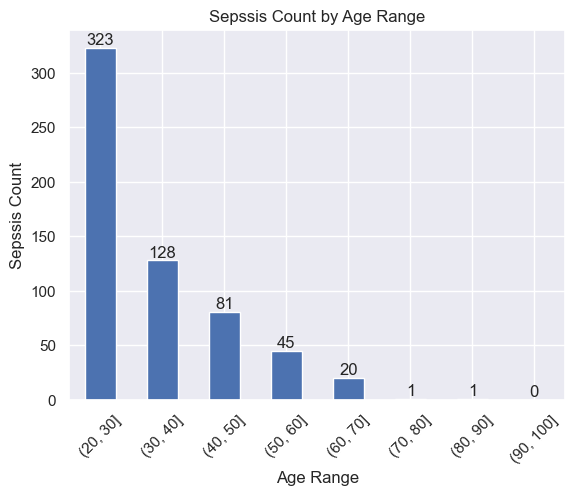

In [24]:
# Assuming your dataset is stored in a DataFrame called 'df'
age_ranges = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100])
grouped_data = df.groupby(age_ranges)

# Calculate the count of 'Sepssis' for each age range
count_sepsis_by_age = grouped_data['Sepssis'].count()

# Plotting the count of 'Sepssis' for each age range
ax = count_sepsis_by_age.plot(kind='bar', xlabel='Age Range', ylabel='Sepssis Count', title='Sepssis Count by Age Range')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [25]:
count_sepsis_by_age

Age
(20, 30]     323
(30, 40]     128
(40, 50]      81
(50, 60]      45
(60, 70]      20
(70, 80]       1
(80, 90]       1
(90, 100]      0
Name: Sepssis, dtype: int64

The disparity observed in the counts and mean values of sepsis cases by age range suggests that while the age range (20, 30] has the highest count of sepsis cases (323 occurrences), the mean value of sepsis cases within this age range is relatively lower (0.23) compared to other age ranges.

This discrepancy can be attributed to the difference in the population size of each age range. The age range (20, 30] has a larger population size, which results in a higher count of sepsis cases. However, when calculating the mean value, which represents the proportion of sepsis cases within each age range, the percentage of sepsis cases within the (20, 30] age range is relatively lower compared to other age ranges.

In other words, while the count of sepsis cases in the (20, 30] age range is high, the proportion of sepsis cases within that age range is relatively lower compared to other age ranges such as (40, 50], (50, 60], and (30, 40].

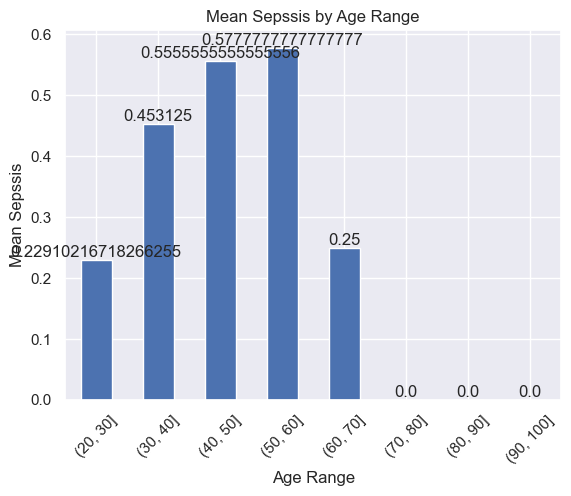

In [26]:
# Calculate the count of 'Sepsis' for each age range
mean_sepsis_by_age = grouped_data['Sepssis_Encoded'].mean()
# Plotting the count of 'Sepssis' for each age range
ax = mean_sepsis_by_age.plot(kind='bar', xlabel='Age Range', ylabel='Mean Sepssis', title='Mean Sepssis by Age Range')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

## Multivariate Analysis 

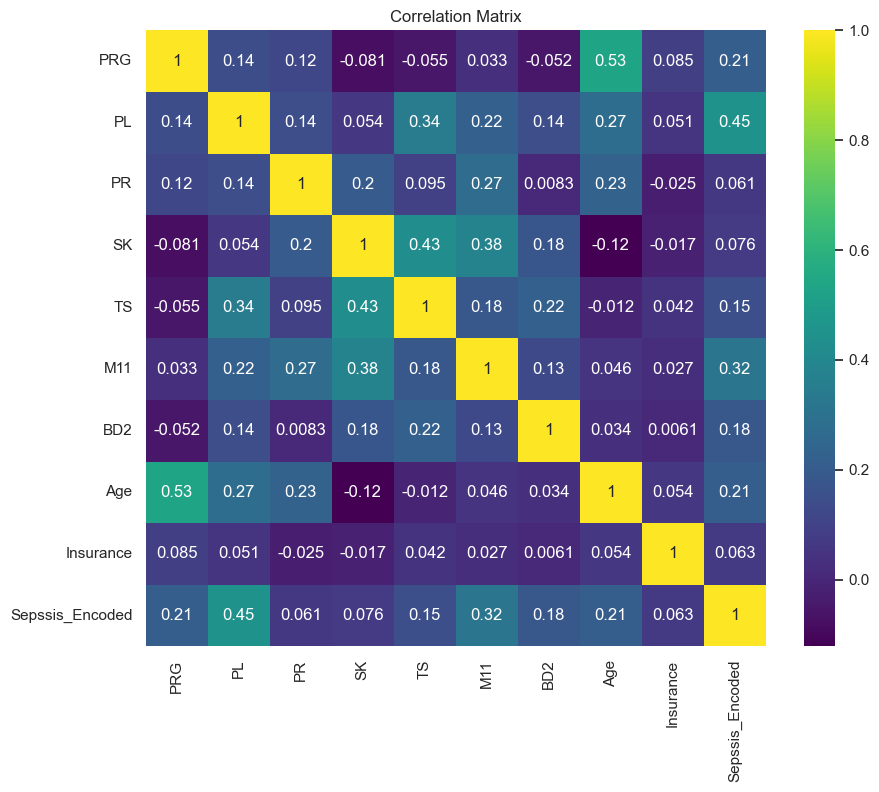

In [27]:
# Calculate correlation matrix
correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


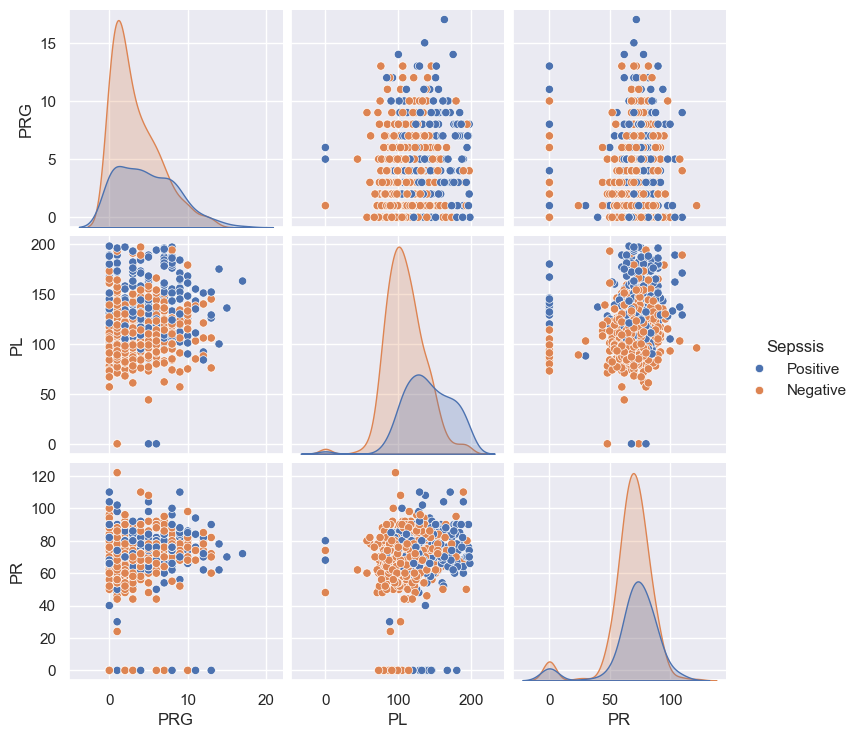

In [28]:
numerical_vars = ['PRG', 'PL', 'PR']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

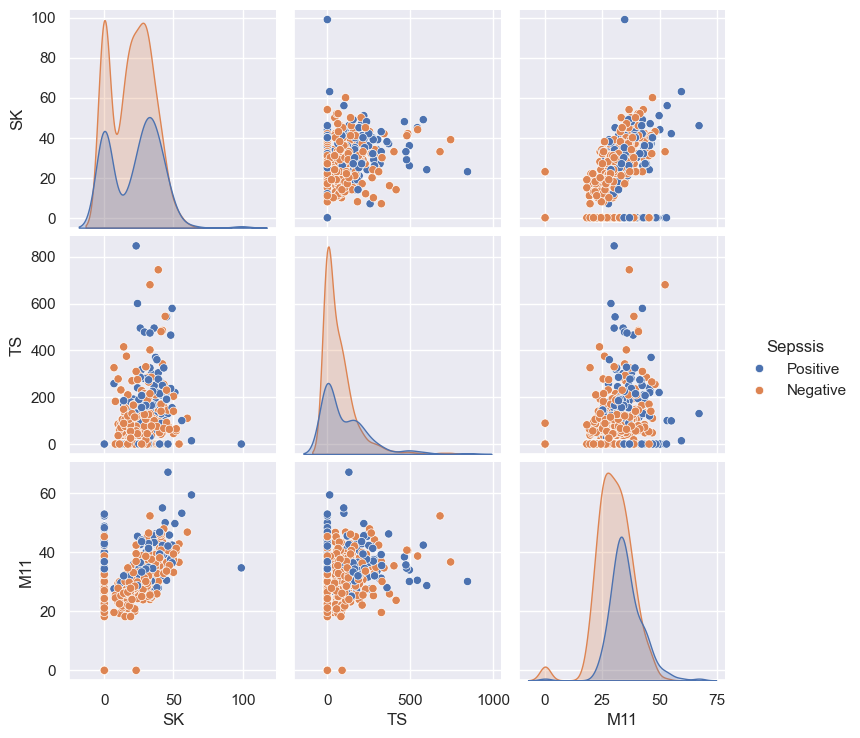

In [29]:
numerical_vars = ['SK', 'TS', 'M11']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

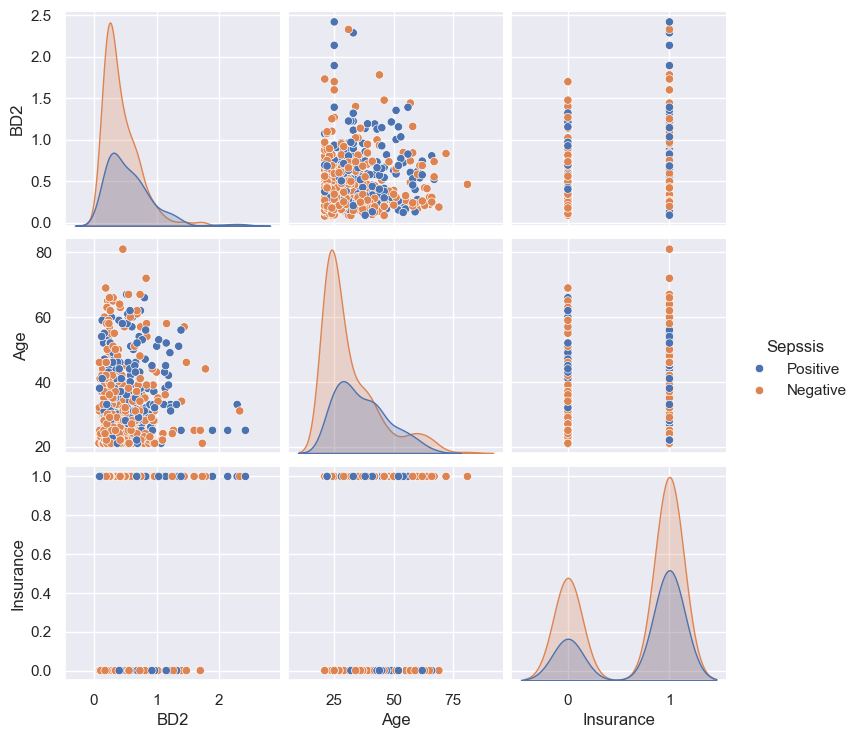

In [30]:
numerical_vars = ['BD2', 'Age', 'Insurance']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

## Hypothesis Testing  

### - Hypothesis 3: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.

- Null Hypothesis: There is no association between higher plasma glucose levels (PRG) and the risk of developing sepsis.

- Alternate Hypothesis: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.

Justification: Elevated glucose levels have been linked to impaired immune function and increased susceptibility to infections, including sepsis.

In [31]:
grouped_data = df.groupby('Sepssis')

positive_group = grouped_data.get_group('Positive')
negative_group = grouped_data.get_group('Negative')


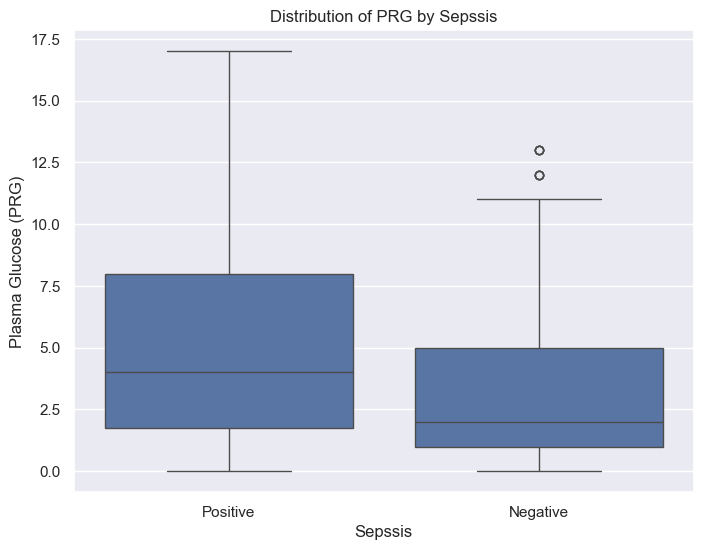

Positive Group:
Mean PRG: 4.778846153846154
Median PRG: 4.0
Standard Deviation: 3.75572151161869

Negative Group:
Mean PRG: 3.317135549872123
Median PRG: 2.0
Standard Deviation: 3.018182162951502

T-Statistic: 5.172721512358376
P-Value: 3.154172341568826e-07


In [32]:
# Compare PRG distribution between the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='PRG')
plt.xlabel('Sepssis')
plt.ylabel('Plasma Glucose (PRG)')
plt.title('Distribution of PRG by Sepssis')
plt.show()

# Calculate summary statistics
positive_prg = positive_group['PRG']
negative_prg = negative_group['PRG']

positive_mean = positive_prg.mean()
positive_median = positive_prg.median()
positive_std = positive_prg.std()

negative_mean = negative_prg.mean()
negative_median = negative_prg.median()
negative_std = negative_prg.std()

print('Positive Group:')
print('Mean PRG:', positive_mean)
print('Median PRG:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean PRG:', negative_mean)
print('Median PRG:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_prg, negative_prg)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


###### Based on the provided:

- Mean PRG (Plasma Glucose) in the Positive Group (patients with sepsis) is 4.78, while in the Negative Group (patients without sepsis) it is 3.32. This suggests that, on average, patients with sepsis tend to have higher plasma glucose levels compared to those without sepsis.

- The median PRG in the Positive Group is 4.0, whereas in the Negative Group it is 2.0. The median represents the middle value of a dataset, and it is less affected by extreme values. This further supports the observation that the central tendency of plasma glucose levels is higher in the Positive Group.

- The standard deviation of PRG in the Positive Group is 3.76, and in the Negative Group, it is 3.02. The standard deviation measures the dispersion of data points around the mean. In this case, both groups have relatively high standard deviations, indicating considerable variability in plasma glucose levels within each group.

- The t-statistic is 5.17, which indicates a significant difference between the means of the Positive and Negative Groups. A larger absolute t-statistic suggests a stronger evidence of a difference between the groups.

- The p-value is 3.15e-07, which is very small. This indicates strong evidence against the null hypothesis (no difference between the groups) and suggests that the difference in mean plasma glucose levels between the groups is statistically significant. 

- In other words, there is a significant association between higher plasma glucose levels and the risk of developing sepsis.

### - Hypothesis 2:  Older patients are more likely to develop sepsis compared to younger patients.

- Null Hypothesis: There is no difference in the likelihood of developing sepsis between older and younger patients.

- Alternate Hypothesis: Older patients are more likely to develop sepsis compared to younger patients.

Justification: Advanced age is a known risk factor for sepsis, as the immune system weakens with age and may be less able to mount an effective response to infections.

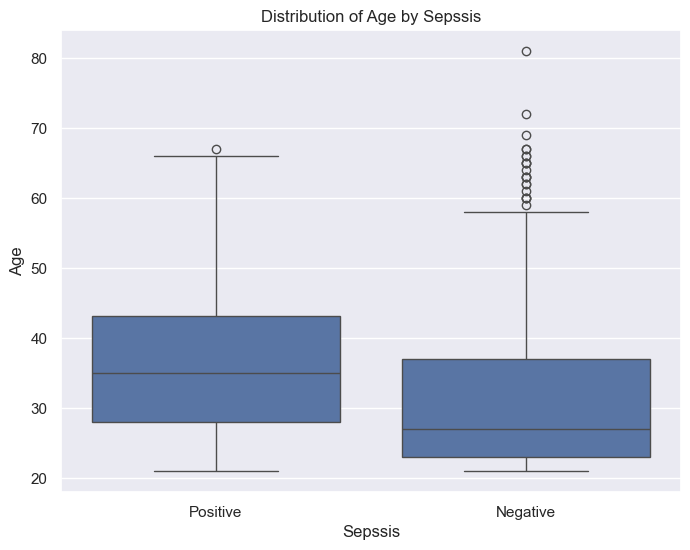

Positive Group:
Mean Age: 36.69711538461539
Median Age: 35.0
Standard Deviation: 10.904929140599736

Negative Group:
Mean Age: 31.47826086956522
Median Age: 27.0
Standard Deviation: 11.913530900036797

T-Statistic: 5.254202967191448
P-Value: 2.0718778891881853e-07


In [33]:
# Compare Age distribution between the positive and negative groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='Age')
plt.xlabel('Sepssis')
plt.ylabel('Age')
plt.title('Distribution of Age by Sepssis')
plt.show()

# Calculate summary statistics
positive_age = positive_group['Age']
negative_age = negative_group['Age']

positive_mean = positive_age.mean()
positive_median = positive_age.median()
positive_std = positive_age.std()

negative_mean = negative_age.mean()
negative_median = negative_age.median()
negative_std = negative_age.std()

print('Positive Group:')
print('Mean Age:', positive_mean)
print('Median Age:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean Age:', negative_mean)
print('Median Age:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_age, negative_age)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


###### Based on the results of the analysis:

###### Positive Group:

Mean Age: 36.70 years
Median Age: 35.0 years
Standard Deviation: 10.90 years

###### Negative Group:

Mean Age: 31.48 years
Median Age: 27.0 years
Standard Deviation: 11.91 years
The t-statistic value is 5.25, and the p-value is 2.07e-07 (very close to zero).

###### Interpretation:
The results indicate a statistically significant difference in age between the positive (sepsis) and negative (non-sepsis) groups. The positive group has a higher mean and median age compared to the negative group. Additionally, the standard deviation in the positive group is slightly lower than the negative group, indicating less variability in age among patients with sepsis.

Therefore, based on this analysis, there is evidence to support the hypothesis that older patients are more likely to develop sepsis compared to younger patients. The advanced age of patients may be a risk factor for sepsis, potentially due to the weakening of the immune system with age. Therefore the NULL hypothesis can be rejected. 

### -  Hypothesis 1: Patients with higher body mass index (BMI) values (M11) have a lower risk of sepsis.

- Null Hypothesis: There is no association between body mass index (BMI) values (M11) and the risk of sepsis.

- Alternate Hypothesis: Patients with higher body mass index (BMI) values (M11) have a lower risk of sepsis.

Justification: Obesity has been associated with a dampened immune response, potentially leading to a decreased risk of developing sepsis.

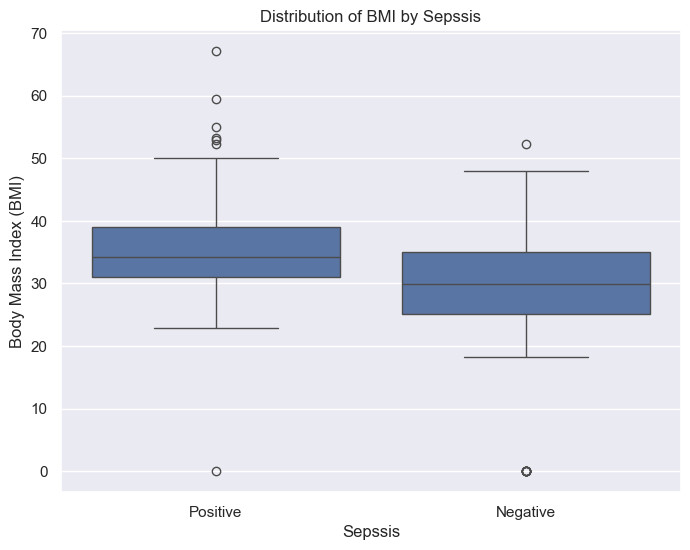

Positive Group:
Mean BMI: 35.385576923076925
Median BMI: 34.3
Standard Deviation: 7.195898164245344

Negative Group:
Mean BMI: 30.076470588235292
Median BMI: 29.9
Standard Deviation: 7.8127318065157585

T-Statistic: 8.134971813407034
P-Value: 2.397251962664531e-15


In [34]:
# Compare BMI distribution between the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='M11')
plt.xlabel('Sepssis')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Distribution of BMI by Sepssis')
plt.show()

# Calculate summary statistics
positive_bmi = positive_group['M11']
negative_bmi = negative_group['M11']

positive_mean = positive_bmi.mean()
positive_median = positive_bmi.median()
positive_std = positive_bmi.std()

negative_mean = negative_bmi.mean()
negative_median = negative_bmi.median()
negative_std = negative_bmi.std()

print('Positive Group:')
print('Mean BMI:', positive_mean)
print('Median BMI:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean BMI:', negative_mean)
print('Median BMI:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_bmi, negative_bmi)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


##### The results of the analysis for the hypothesis regarding body mass index (BMI) and the risk of sepsis are as follows:

##### Positive Group:

Mean BMI: 35.3856
Median BMI: 34.3
Standard Deviation: 7.1959

##### Negative Group:

Mean BMI: 30.0765
Median BMI: 29.9
Standard Deviation: 7.8127
T-Statistic: 8.13497
P-Value: 2.39725e-15

##### Interpretation:
The results indicate a statistically significant difference in BMI between the positive sepsis group and the negative sepsis group. The positive sepsis group has a higher mean BMI (35.3856) compared to the negative sepsis group (30.0765). The t-statistic of 8.13497 suggests a substantial difference between the two groups.

Furthermore, the very small p-value of 2.39725e-15 suggests strong evidence against the null hypothesis (no difference in BMI between the groups). In other words, there is a significant association between higher BMI values and a lower risk of sepsis. This supports the hypothesis that patients with higher BMI values are less likely to develop sepsis.

It's important to note that correlation does not imply causation, and additional factors or confounding variables may be influencing this relationship. Therefore, further research and analysis are recommended to gain a deeper understanding of the underlying mechanisms and potential causal relationships.

###### further analysis: 

Stratified Analysis: Divide the dataset into subgroups based on BMI ranges and examine the sepsis incidence within each subgroup. This can help identify if there is a specific BMI range that exhibits a stronger association with sepsis risk.

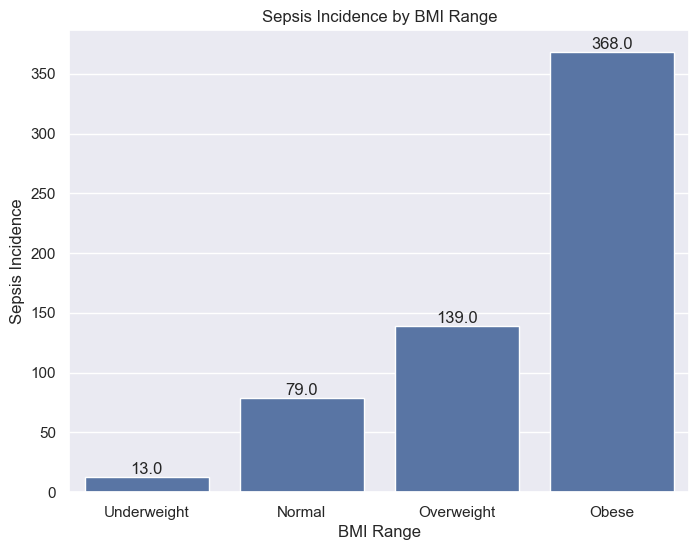

In [35]:
# Define the BMI ranges
bmi_ranges = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create a new column to represent BMI ranges
df['BMI Range'] = pd.cut(df['M11'], bins=bmi_ranges, labels=bmi_labels, include_lowest=True)

# Group the data by BMI range and calculate the sepsis incidence
grouped = df.groupby('BMI Range')['Sepssis'].count().reset_index()

# Plot the sepsis incidence by BMI range
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='BMI Range', y='Sepssis')
plt.xlabel('BMI Range')
plt.ylabel('Sepsis Incidence')
plt.title('Sepsis Incidence by BMI Range')

# Add data labels
for p in plt.gca().patches:
    count = p.get_height()
    plt.gca().annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

### Data Imbalance Check

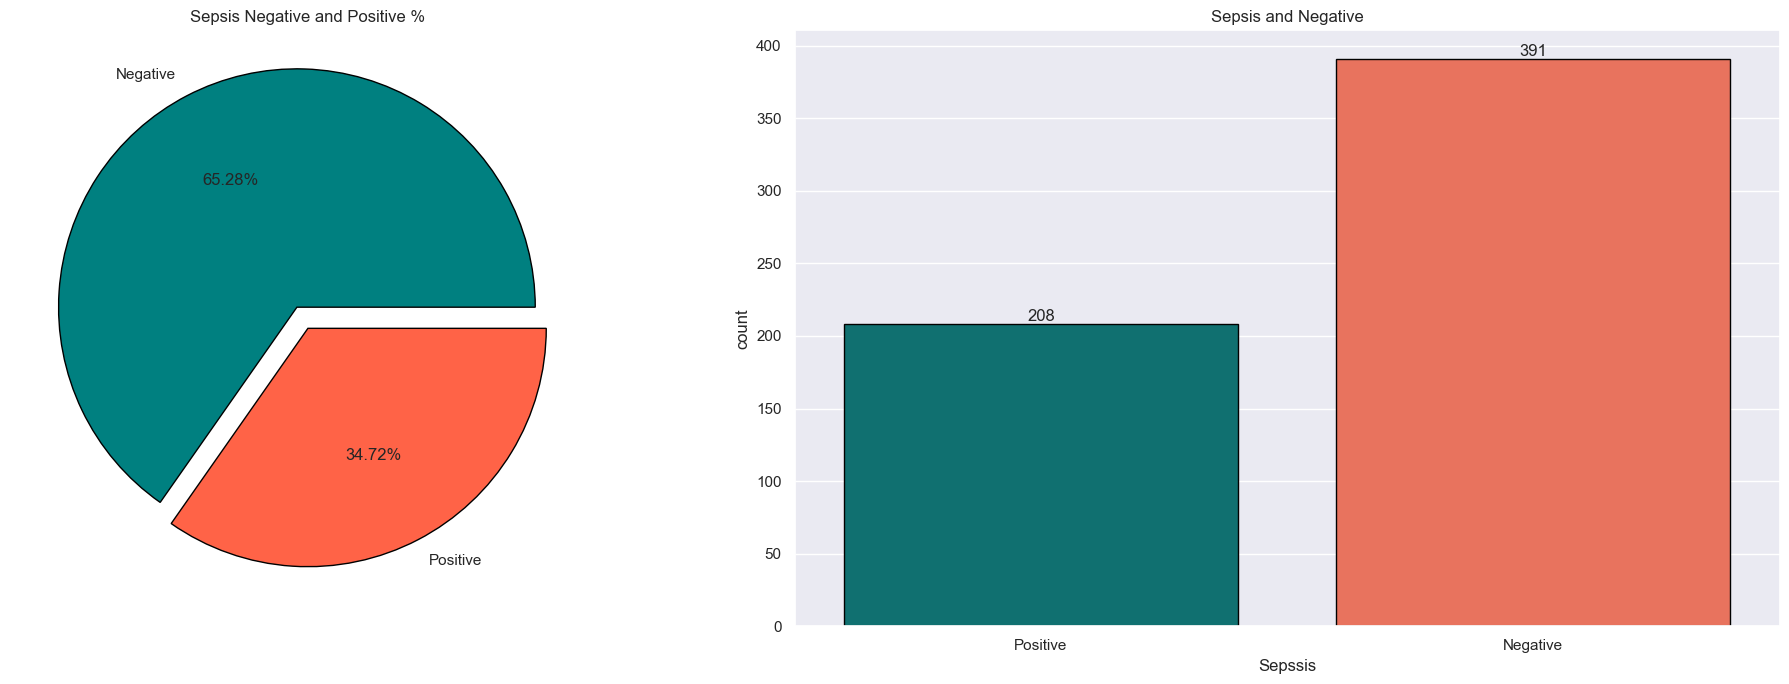

In [36]:
# Define colors for the plots
palette = ['#008080', '#FF6347', '#E50000', '#D2691E']

# Calculate the percentage of positive and negative values
sepsis_counts = df['Sepssis'].value_counts()
pie_values = [sepsis_counts[0] / sepsis_counts.sum() * 100, sepsis_counts[1] / sepsis_counts.sum() * 100]

# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the pie chart on the first subplot
axes[0].pie(pie_values, labels=['Negative', 'Positive'], autopct='%1.2f%%', explode=(0.1, 0),
            colors=palette[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Sepsis Negative and Positive %')

# Plot the countplot on the second subplot
sns.countplot(data=df, x='Sepssis', palette=palette[:2], edgecolor='black', ax=axes[1])
axes[1].set_xticklabels(['Positive', 'Negative'])
axes[1].set_title('Sepsis and Negative')

# Add labels to the countplot bars
for container in axes[1].containers:
    axes[1].bar_label(container)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


As can be observed the dataset is imbalanced and therefore particular attention needs to be paid in the selection of ML models

## Drop Duplicates

In [37]:
def check_duplicate_rows(data):
    duplicate_rows = data.duplicated()
    num_duplicates = duplicate_rows.sum()
    print("Number of duplicate rows:", num_duplicates)

In [38]:
# Check duplicate rows in train data
check_duplicate_rows(train)

# Check duplicate rows in test data
check_duplicate_rows(test)


Number of duplicate rows: 0
Number of duplicate rows: 0


## Impute Missing Values

In [39]:
def check_missing_values(data):
    missing_values = data.isna().sum()
    print("Missing values:\n", missing_values)

In [40]:
# Check missing values in train data
check_missing_values(train)

# Check missing values in test data
check_missing_values(test)


Missing values:
 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64
Missing values:
 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64


## Features Encoding

In [41]:
def encode_target_variable(data, target_variable):
    # Encode the target variable using LabelEncoder
    label_encoder = LabelEncoder()
    encoded_target = label_encoder.fit_transform(data[target_variable])
    target_encoded = pd.DataFrame(encoded_target, columns=[target_variable])

    # Combine the features and the encoded target variable
    data_encoded = pd.concat([data.iloc[:, :-1], target_encoded], axis=1)
    data_encoded.drop('ID', axis=1, inplace=True)

    return data_encoded


In [42]:
# Encode target variable in train data
train_encoded = encode_target_variable(train, 'Sepssis')

# Print the encoded train data
print(train_encoded.head())

   PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepssis
0    6  148  72  35    0  33.6  0.627   50          0        1
1    1   85  66  29    0  26.6  0.351   31          0        0
2    8  183  64   0    0  23.3  0.672   32          1        1
3    1   89  66  23   94  28.1  0.167   21          1        0
4    0  137  40  35  168  43.1  2.288   33          1        1


In [43]:
test.drop('ID',axis=1,inplace=True)

## Dataset Splitting

In [44]:
def split_data(X, y, test_size, random_state=42, stratify=None):
    # Split the data into train and validation sets
    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)

    return X_train, X_eval, y_train, y_eval

In [45]:
# Split the data into train and validation sets for both X and y
X_train, X_eval, y_train, y_eval = split_data(train_encoded.iloc[:, :-1], train_encoded.iloc[:, -1:], test_size=0.2, random_state=42, stratify=train_encoded.iloc[:, -1:])

# Print the shapes of the train and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_eval shape:", X_eval.shape)
print("y_eval shape:", y_eval.shape)

X_train shape: (479, 9)
y_train shape: (479, 1)
X_eval shape: (120, 9)
y_eval shape: (120, 1)


## Imputting Missing Values

In [46]:
# Creating imputer variables
numerical_imputer = SimpleImputer(strategy = "mean")

numerical_imputer.fit(X_train)

X_train_imputed = numerical_imputer.transform(X_train)
X_eval_imputed = numerical_imputer.transform(X_eval)
X_test_imputed = numerical_imputer.transform(test)

## Features Scaling

In [47]:
scaler = StandardScaler()
scaler.fit(X_train_imputed)

columns = ['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance']

def scale_data(data, scaler, columns):
    scaled_data = scaler.transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=columns)
    return scaled_df

In [48]:
# Scale the data
X_train_df = scale_data(X_train_imputed, scaler, columns)
X_eval_df = scale_data(X_eval_imputed, scaler, columns)
X_test = scale_data(X_test_imputed, scaler, columns)

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

### Simple Model #001 - Linear regression

Please, keep the following structure to try all the model you want.

In [49]:
def logistic_regression_model(X_train, y_train, X_eval, y_eval):
    # Fit logistic regression model
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    lr_preds = lr_model.predict(X_eval)

    # Calculate F1 score
    lr_f1_score = f1_score(y_eval, lr_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, lr_preds)

    # Calculate AUC score
    lr_auc_score = roc_auc_score(y_eval, lr_preds)

    return lr_model, lr_preds, lr_f1_score, fpr, tpr, thresholds, lr_auc_score


In [50]:
# Call the function and get the outputs
lr_model, lr_preds, lr_f1_score, fpr, tpr, thresholds, lr_auc_score = logistic_regression_model(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score:", lr_f1_score)
print("AUC Score:", lr_auc_score)


F1 Score: 0.6265060240963856
AUC Score: 0.7133699633699634


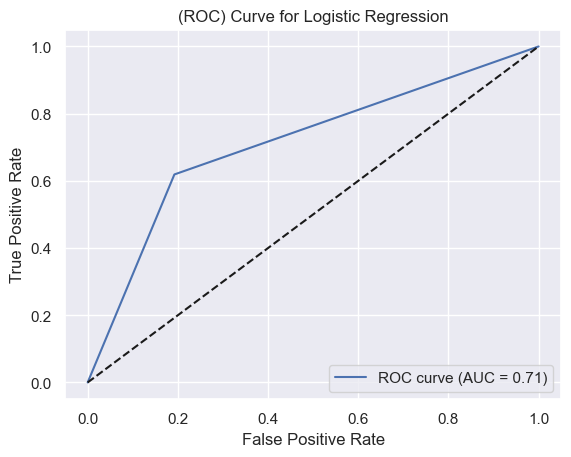

In [51]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % lr_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

##### Checking for overfitting 

In [53]:
def calculate_f1_score(model, X, y):
    predictions = model.predict(X)
    f1 = f1_score(y, predictions)
    return f1

In [54]:
# Calculate F1 scores for training and evaluation sets
Lr_train_f1_score = calculate_f1_score(lr_model, X_train_df, y_train)
lr_eval_f1_score = calculate_f1_score(lr_model, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set:", Lr_train_f1_score)
print("F1 Score on Evaluation Set:", lr_eval_f1_score)


F1 Score on Training Set: 0.6486486486486487
F1 Score on Evaluation Set: 0.6265060240963856


In [63]:
def perform_cross_validation(model, X, y, cv=5, scoring='f1'):
    # Perform cross-validation
  cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)

# Extract scores from cv_results
  cv_scores = cv_results['test_score']
  
    # Calculate the average score
  avg_score = np.mean(cv_scores)

  return cv_scores, avg_score

In [65]:
# Call the function with your logistic regression model and train data
cv_scores, avg_f1_score = perform_cross_validation(lr_model, X_train_df, y_train, cv=5, scoring='f1')

# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)

Cross-Validation Scores: [0.6557377  0.64615385 0.65384615 0.55555556 0.70967742]
Average F1 Score: 0.6441941359656855


### Simple Model #002 - Decision trees

In [66]:
def evaluate_decision_tree(X_train, y_train, X_eval, y_eval):
    # Create and fit the decision tree classifier model
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    dt_pred = dt_model.predict(X_eval)

    # Calculate the F1 score
    dt_f1_score = f1_score(y_eval, dt_pred)

    # Calculate the false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, dt_pred)

    # Calculate the AUC (Area Under the Curve)
    dt_auc_score = roc_auc_score(y_eval, dt_pred)
    return dt_model, dt_pred, dt_f1_score, dt_auc_score



In [67]:
# Call the function with your train and evaluation data
dt_model, dt_pred, dt_f1_score, dt_auc_score = evaluate_decision_tree(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score:", dt_f1_score)
print("AUC Score:", dt_auc_score)


F1 Score: 0.6024096385542169
AUC Score: 0.6950549450549451


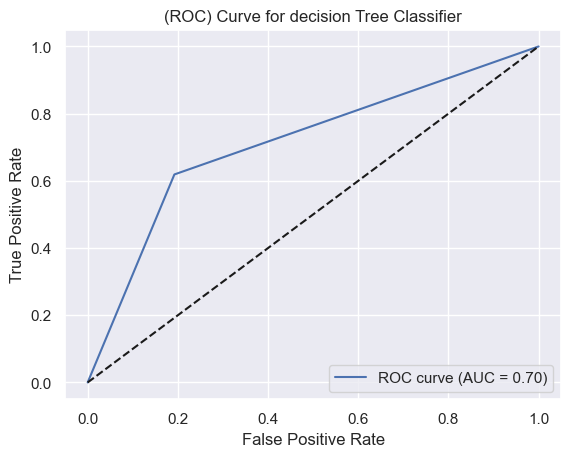

In [68]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % dt_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

##### Checking for overfitting 

In [69]:
# Calculate F1 scores for training and evaluation sets
dt_train_f1_score = calculate_f1_score(dt_model, X_train_df, y_train)
dt_eval_f1_score = calculate_f1_score(dt_model, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set:", dt_train_f1_score)
print("F1 Score on Evaluation Set:", dt_eval_f1_score)


F1 Score on Training Set: 1.0
F1 Score on Evaluation Set: 0.6024096385542169


In [70]:
# Call the function with your logistic regression model and train data
cv_scores, avg_f1_score = perform_cross_validation(dt_model, X_train_df, y_train, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)

Cross-Validation Scores: [0.49180328 0.57142857 0.43636364 0.58461538 0.4516129 ]
Average F1 Score: 0.5071647548643846


### Simple Model #003 - Random Forest Classifier

In [71]:
def random_forest_model(X_train, y_train, X_eval, y_eval):
    # Fit Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    rf_preds = rf_model.predict(X_eval)

    # Calculate F1 score
    rf_f1_score = f1_score(y_eval, rf_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, rf_preds)

    # Calculate AUC score
    rf_auc_score = roc_auc_score(y_eval, rf_preds)

    return rf_model, rf_preds, rf_f1_score, fpr, tpr, thresholds, rf_auc_score


In [72]:
rf_model, rf_preds, rf_f1_score, fpr, tpr, thresholds, rf_auc_score = random_forest_model(X_train, y_train, X_eval, y_eval)

print("F1 Score:", rf_f1_score)
print("AUC Score:", rf_auc_score)


F1 Score: 0.5783132530120482
AUC Score: 0.6767399267399268


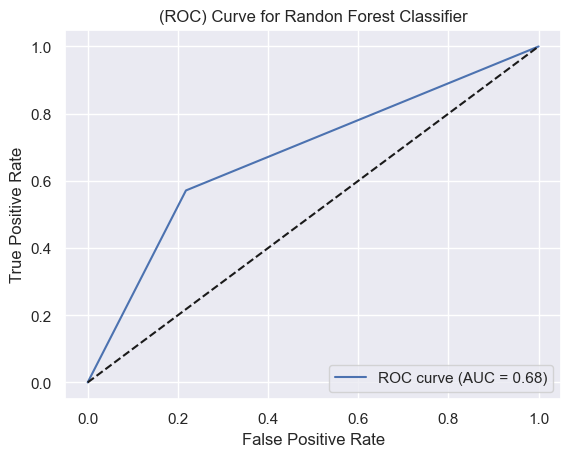

In [73]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % rf_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Randon Forest Classifier')
plt.legend(loc='lower right')
plt.show()

In [74]:
# Calculate F1 scores for training and evaluation sets
rf_train_f1_score = calculate_f1_score(rf_model, X_train_df, y_train)
rf_eval_f1_score = calculate_f1_score(rf_model, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set based on Random Forest:", rf_train_f1_score)
print("F1 Score on Evaluation Set based on Random Forest:", rf_eval_f1_score)


F1 Score on Training Set based on Random Forest: 0.0
F1 Score on Evaluation Set based on Random Forest: 0.0


In [75]:
# Call the function with your Random Forest model and train data
cv_scores, avg_f1_score = perform_cross_validation(rf_model, X_train_df, y_train, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)

Cross-Validation Scores: [0.73846154 0.65671642 0.54901961 0.54545455 0.61290323]
Average F1 Score: 0.6205110670952242


### Simple Model #004 - XGBClassifier

In [76]:
def xgboost_model(X_train, y_train, X_eval, y_eval):
    # Fit XGBoost model
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    xgb_preds = xgb_model.predict(X_eval)

    # Calculate F1 score
    xgb_f1_score = f1_score(y_eval, xgb_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, xgb_preds)

    # Calculate AUC score
    xgb_auc_score = roc_auc_score(y_eval, xgb_preds)

    return xgb_model, xgb_preds, xgb_f1_score, fpr, tpr, thresholds, xgb_auc_score


In [77]:
xgb_model, xgb_preds, xgb_f1_score, fpr, tpr, thresholds, xgb_auc_score = xgboost_model(X_train_df, y_train, X_eval_df, y_eval)

# Print the F1 score and AUC score
print("F1 Score on Evaluation Set based on XGBoost:", xgb_f1_score)
print("AUC Score on Evaluation Set based on XGBoost:", xgb_auc_score)


F1 Score on Evaluation Set based on XGBoost: 0.5882352941176471
AUC Score on Evaluation Set based on XGBoost: 0.6822344322344323


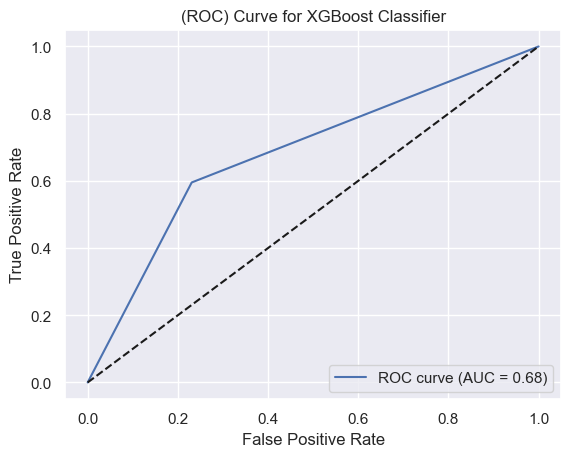

In [78]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % xgb_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()

In [79]:
# Calculate F1 scores for training and evaluation sets
xgb_train_f1_score = calculate_f1_score(xgb_model, X_train_df, y_train)
xgb_eval_f1_score = calculate_f1_score(xgb_model, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set based on XGboost:", xgb_train_f1_score)
print("F1 Score on Evaluation Set based on XGboost:", xgb_eval_f1_score)


F1 Score on Training Set based on XGboost: 1.0
F1 Score on Evaluation Set based on XGboost: 0.5882352941176471


In [80]:
# Call the function with your XGboost model and train data
cv_scores, avg_f1_score = perform_cross_validation(xgb_model, X_train_df, y_train, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores based on XGboost:", cv_scores)
print("Average F1 Score based on XGboost:", avg_f1_score)

Cross-Validation Scores based on XGboost: [0.65671642 0.67647059 0.5        0.56666667 0.60606061]
Average F1 Score based on XGboost: 0.601182855774603


### Simple Model #005 - Naive Bayes model

In [81]:
def naive_bayes_model(X_train, y_train, X_eval, y_eval):
    # Fit Naive Bayes model
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    nb_preds = nb_model.predict(X_eval)

    # Calculate F1 score
    nb_f1_score = f1_score(y_eval, nb_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, nb_preds)

    # Calculate AUC score
    nb_auc_score = roc_auc_score(y_eval, nb_preds)

    return nb_model, nb_preds, nb_f1_score, fpr, tpr, thresholds, nb_auc_score


In [82]:
nb_model, nb_preds, nb_f1_score, fpr, tpr, thresholds, nb_auc_score = naive_bayes_model(X_train_df, y_train, X_eval_df, y_eval)

# Print the F1 score and AUC score
print("F1 Score on Evaluation Set based on Naive Bayes:", nb_f1_score)
print("AUC Score on Evaluation Set based on Naive Bayes:", nb_auc_score)


F1 Score on Evaluation Set based on Naive Bayes: 0.5747126436781609
AUC Score on Evaluation Set based on Naive Bayes: 0.6694139194139194


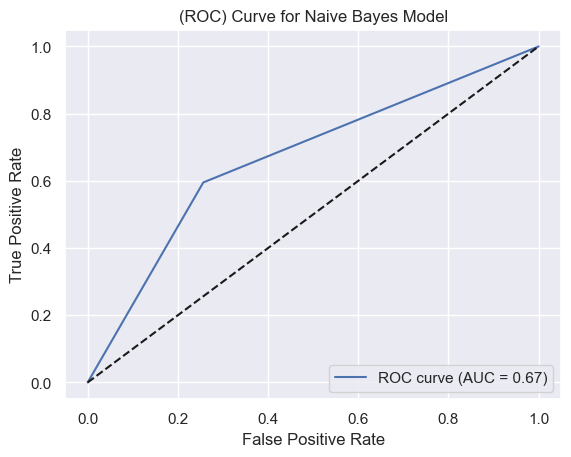

In [83]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % nb_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Naive Bayes Model')
plt.legend(loc='lower right')
plt.show()

In [84]:
# Calculate F1 scores for training and evaluation sets
nb_train_f1_score = calculate_f1_score(nb_model, X_train_df, y_train)
nb_eval_f1_score = calculate_f1_score(nb_model, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set based on XGboost:", nb_train_f1_score)
print("F1 Score on Evaluation Set based on XGboost:", nb_eval_f1_score)


F1 Score on Training Set based on XGboost: 0.6730769230769231
F1 Score on Evaluation Set based on XGboost: 0.5747126436781609


In [85]:
# Call the function with your Naive Bayes model and train data
cv_scores, avg_f1_score = perform_cross_validation(nb_model, X_train_df, y_train, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores based on Naive Bayes model:", cv_scores)
print("Average F1 Score based on Naive Bayes model:", avg_f1_score)

Cross-Validation Scores based on Naive Bayes model: [0.70769231 0.6        0.7        0.63157895 0.67741935]
Average F1 Score based on Naive Bayes model: 0.6633381219798877


### Simple Model #006 - Stochastic Grad Descent 

In [86]:
def sgd_model_func(X_train, y_train, X_eval, y_eval):
    # Fit SGD model
    sgd_model = SGDClassifier()
    sgd_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    sgd_preds = sgd_model.predict(X_eval)

    # Calculate F1 score
    sgd_f1_score = f1_score(y_eval, sgd_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, sgd_preds)

    # Calculate AUC score
    sgd_auc_score = roc_auc_score(y_eval, sgd_preds)

    return sgd_model, sgd_preds, sgd_f1_score, fpr, tpr, thresholds, sgd_auc_score


In [87]:
sgd_model, sgd_preds, sgd_f1_score, fpr, tpr, thresholds, sgd_auc_score = sgd_model_func(X_train_df, y_train, X_eval_df, y_eval)

# Print the F1 score and AUC score
print("F1 Score on Evaluation Set based on SGD:", sgd_f1_score)
print("AUC Score on Evaluation Set based on SGD:", sgd_auc_score)


F1 Score on Evaluation Set based on SGD: 0.5581395348837209
AUC Score on Evaluation Set based on SGD: 0.6575091575091575


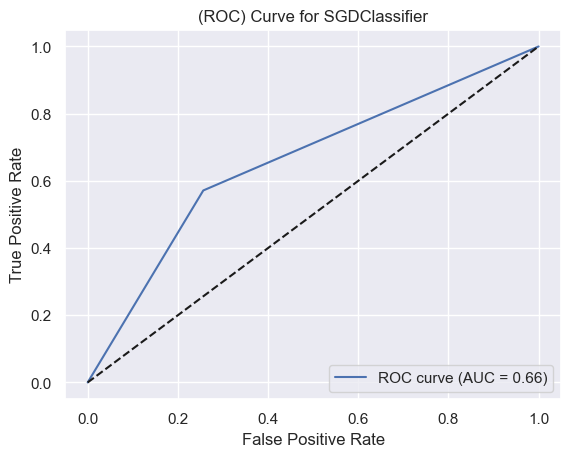

In [88]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % sgd_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for SGDClassifier')
plt.legend(loc='lower right')
plt.show()

In [89]:
sgd_train_f1_score = calculate_f1_score(sgd_model, X_train_df, y_train)
sgd_eval_f1_score = calculate_f1_score(sgd_model, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set based on SGDClassifier:", sgd_train_f1_score)
print("F1 Score on Evaluation Set based on SGDClassifier:", sgd_eval_f1_score)


F1 Score on Training Set based on SGDClassifier: 0.6111111111111112
F1 Score on Evaluation Set based on SGDClassifier: 0.5581395348837209


In [90]:
# Call the function with your Naive Bayes model and train data
cv_scores, avg_f1_score = perform_cross_validation(sgd_model, X_train_df, y_train, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores based on Naive Bayes model:", cv_scores)
print("Average F1 Score based on Naive Bayes model:", avg_f1_score)

Cross-Validation Scores based on Naive Bayes model: [0.71641791 0.6557377  0.54237288 0.50847458 0.71428571]
Average F1 Score based on Naive Bayes model: 0.6274577574557254


In [91]:
results_No_SMOTE= {'model':['Decision Tree','Random Forest','XGBoost','Logistic Regression','Naive Bayes','SGBoost'],
         'f1_score':[dt_f1_score,rf_f1_score,xgb_f1_score,lr_f1_score,nb_f1_score,sgd_f1_score],
         'AUC_score':[dt_auc_score,rf_auc_score,xgb_auc_score,lr_auc_score,nb_auc_score,sgd_auc_score]}

results_No_SMOTE_df= pd.DataFrame(results_No_SMOTE)
results_No_SMOTE_df_sorted = results_No_SMOTE_df.sort_values(by= 'AUC_score', ascending = False)
results_No_SMOTE_df_sorted

,model,f1_score,AUC_score
3,Logistic Regression,0.626506,0.713370
0,Decision Tree,0.602410,0.695055
2,XGBoost,0.588235,0.682234
1,Random Forest,0.578313,0.676740
4,Naive Bayes,0.574713,0.669414
5,SGBoost,0.558140,0.657509


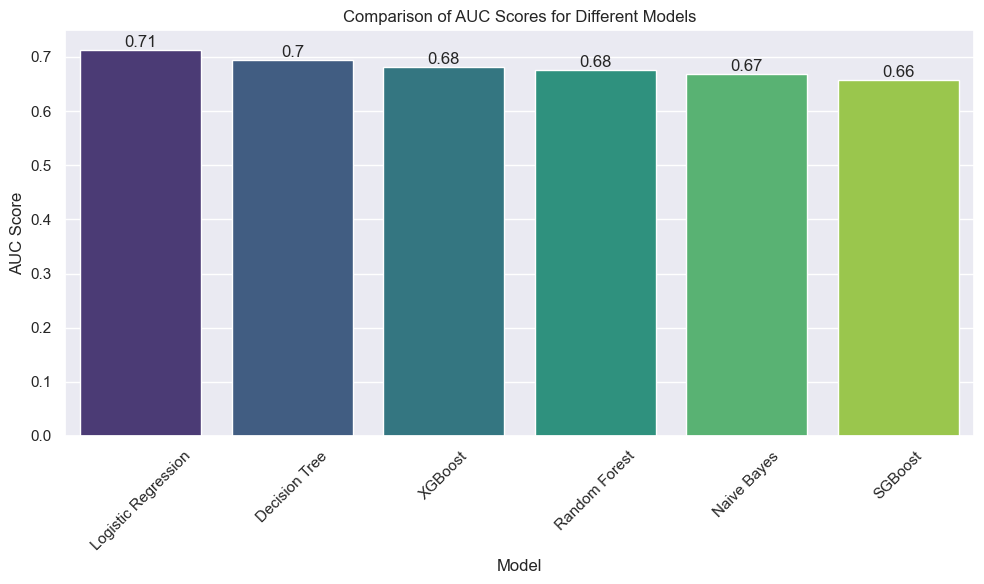

In [92]:
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=results_No_SMOTE_df_sorted, x='model', y='AUC_score', palette='viridis')

# Add data labels
for i, value in enumerate(results_No_SMOTE_df_sorted['AUC_score']):
    plt.text(i, value, round(value, 2), ha='center', va='bottom')

# Set other plot properties
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('Comparison of AUC Scores for Different Models')
plt.tight_layout()
plt.show()


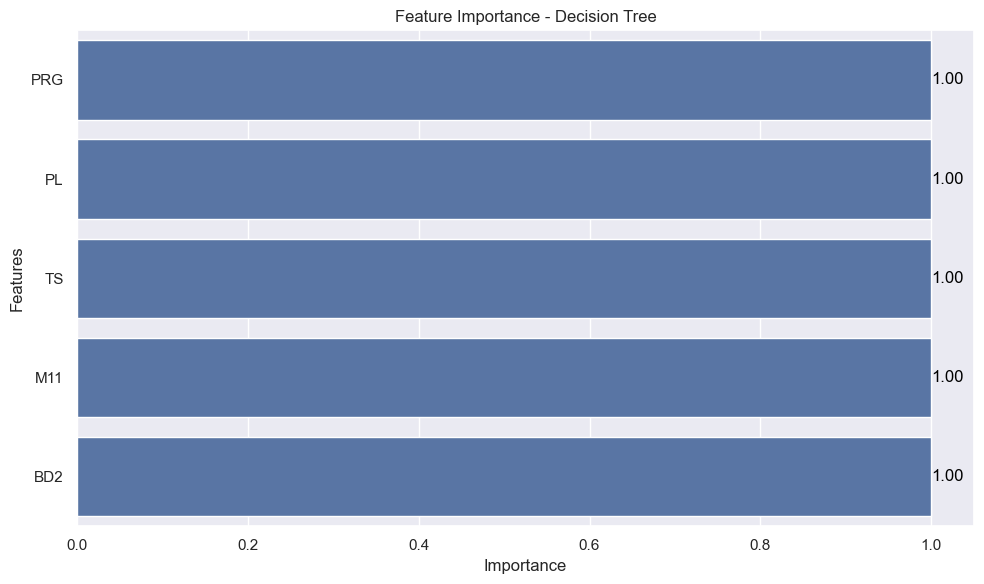

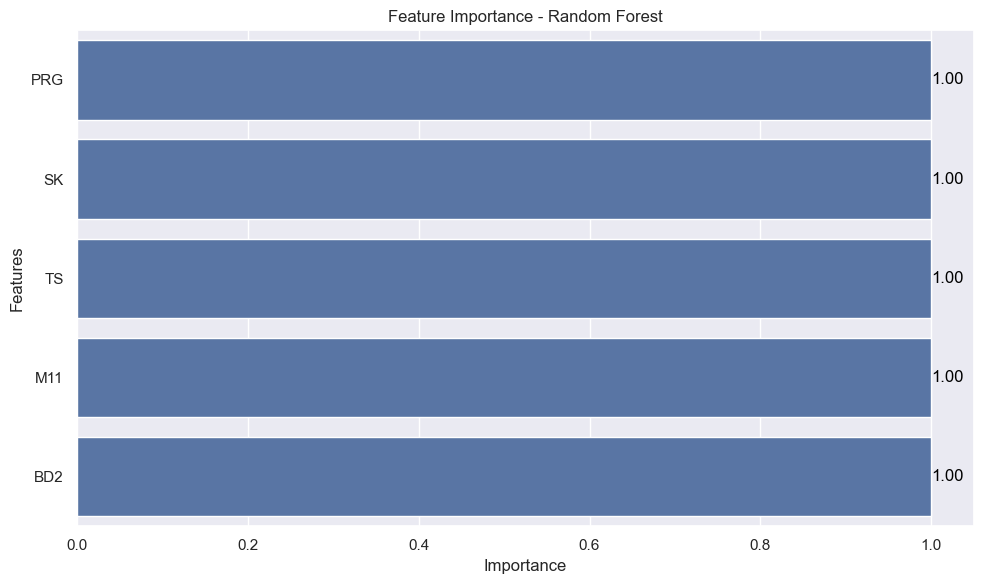

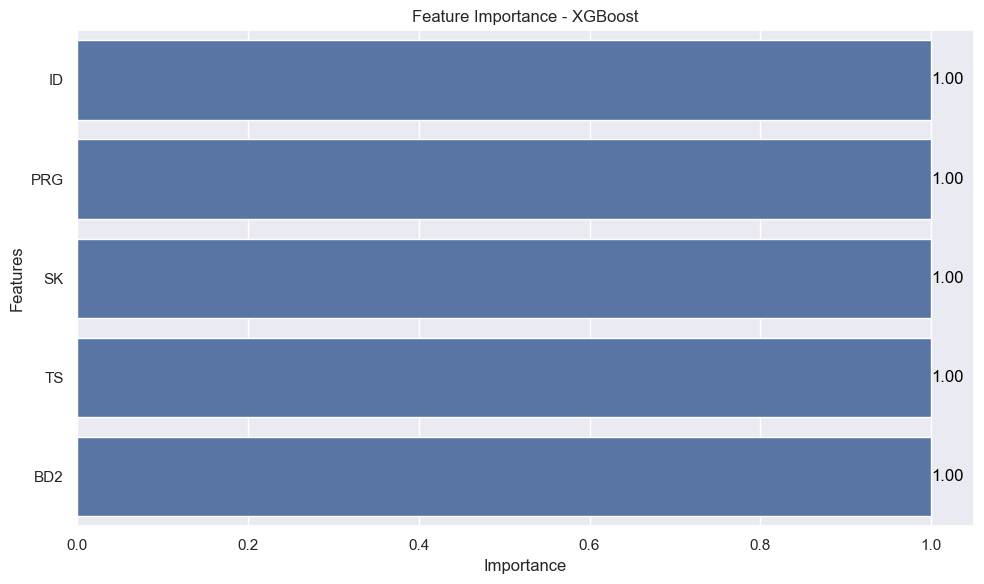

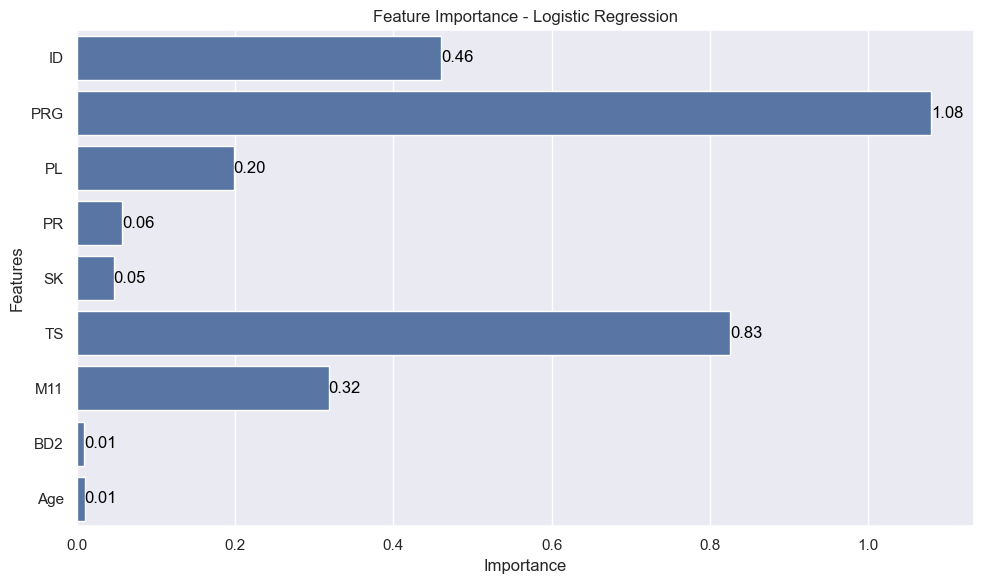

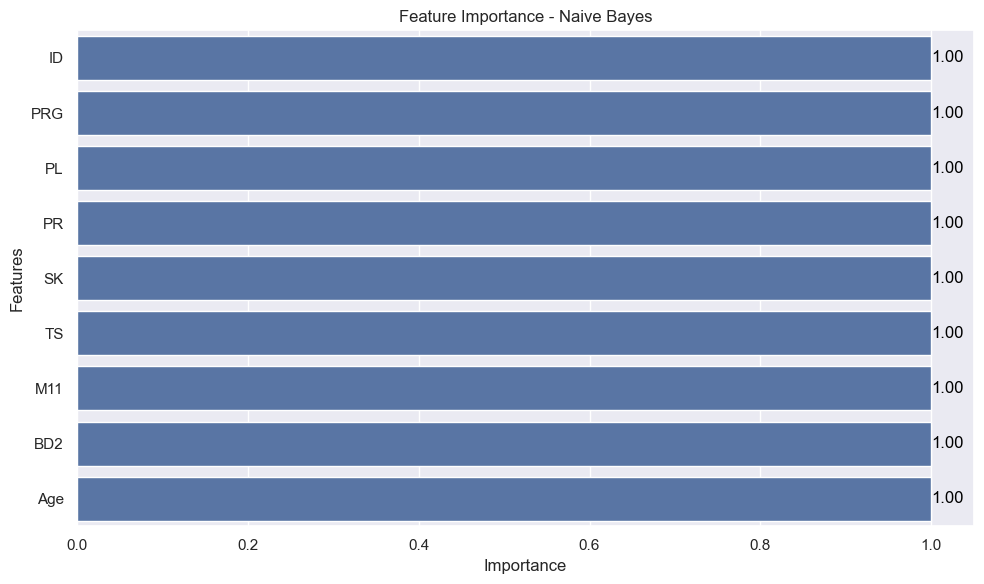

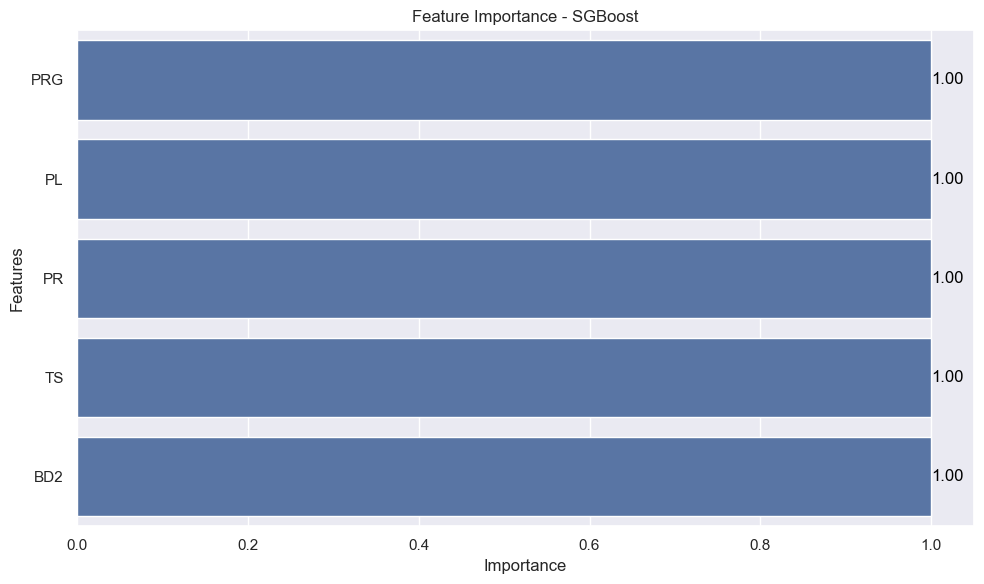

In [93]:
def get_feature_importance(model, X_train_df, y_train, num_features):
    if isinstance(model, LogisticRegression):
        # For logistic regression, use the coefficients as feature importance
        importances = np.abs(model.coef_[0])
    elif isinstance(model, GaussianNB):
        # For Naive Bayes, use feature variances as importance
        importances = np.var(X_train_df, axis=0)
    else:
        # For other models, use RFE for feature importance
        rfe = RFE(model, n_features_to_select=num_features)
        rfe.fit(X_train_df, y_train)
        importances = rfe.support_
    
    return importances

# Assuming you have the trained models available
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Logistic Regression': lr_model,
    'Naive Bayes': nb_model,
    'SGBoost': sgd_model
}

# Define the number of features you want to select
num_features = 5

# Iterate over each model and display feature importance
for model_name, model in models.items():
    importances = get_feature_importance(model, X_train_df, y_train, num_features)
    features = df.columns

    # Get the indices of the selected features
    indices = np.where(importances)[0]

    # Plotting feature importances using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=features[indices])
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.tight_layout()

    # Add data labels to the bar plot
    for i, v in enumerate(importances[indices]):
        plt.text(v, i, f'{v:.2f}', color='black', ha='left', va='center')

    plt.show()


## Optional: Train Dataset Balancing 

In [94]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html
oversample= SMOTE()
X_train_resampled,y_train_resampled= oversample.fit_resample(X_train_df, y_train)
X_train_resampled.shape,y_train_resampled.shape

((626, 9), (626, 1))

### Balanced Model #001

In [95]:
# Call the logistic_regression_model function passing the balanced training data and evaluation data
lr_model_b, lr_preds_b, lr_f1_score_b, fpr_b, tpr_b, thresholds_b, lr_auc_score_b = logistic_regression_model(X_train_resampled, y_train_resampled, X_eval_df, y_eval)
print("F1 Score:", lr_f1_score_b)
print("AUC Score:", lr_auc_score_b)


F1 Score: 0.6526315789473685
AUC Score: 0.728021978021978


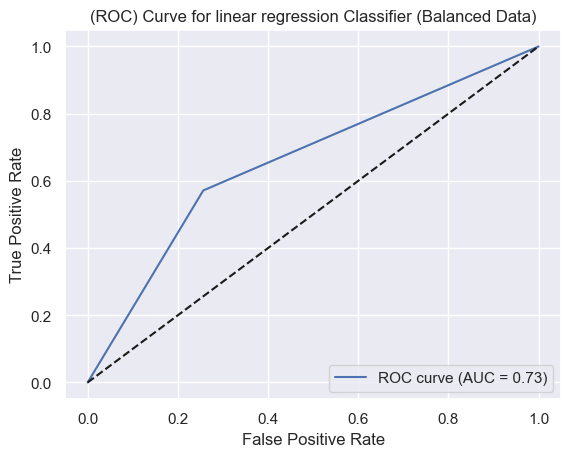

In [96]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % lr_auc_score_b)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for linear regression Classifier (Balanced Data)')
plt.legend(loc='lower right')
plt.show()

In [97]:
lr_train_f1_score_b = calculate_f1_score(lr_model_b, X_train_resampled, y_train_resampled)
lr_eval_f1_score_b = calculate_f1_score(lr_model_b, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set for Logistic regression with balanced data:", lr_train_f1_score_b)
print("F1 Score on Evaluation Set for Logistic regression with balanced data:", lr_eval_f1_score_b)


F1 Score on Training Set for Logistic regression with balanced data: 0.756578947368421
F1 Score on Evaluation Set for Logistic regression with balanced data: 0.6526315789473685


In [98]:
# Call the function with your Logistic Regression model and train data
cv_scores, avg_f1_score = perform_cross_validation(lr_model_b, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores for Logistic regression with balanced data:", cv_scores)
print("Average F1 Score based for Logistic regression with balanced data:", avg_f1_score)

Cross-Validation Scores for Logistic regression with balanced data: [0.75       0.70967742 0.74336283 0.77419355 0.73770492]
Average F1 Score based for Logistic regression with balanced data: 0.7429877435266259


### Balanced Model #002

In [99]:
# Call the function with your train and evaluation data
dt_model_b, dt_pred_b, dt_f1_score_b, dt_auc_score_b = evaluate_decision_tree(X_train_resampled, y_train_resampled, X_eval_df, y_eval)

print("F1 Score:", dt_f1_score_b)
print("AUC Score:", dt_auc_score_b)


F1 Score: 0.6105263157894737
AUC Score: 0.6913919413919414


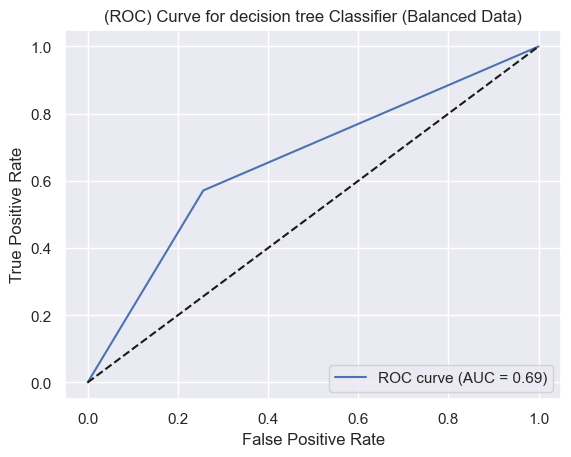

In [100]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % dt_auc_score_b)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for decision tree Classifier (Balanced Data)')
plt.legend(loc='lower right')
plt.show()

In [101]:
dt_train_f1_score_b = calculate_f1_score(dt_model_b, X_train_resampled, y_train_resampled)
dt_eval_f1_score_b = calculate_f1_score(dt_model_b, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set for decision tree with balanced data:", dt_train_f1_score_b)
print("F1 Score on Evaluation Set for decision tree with balanced data:", dt_eval_f1_score_b)


F1 Score on Training Set for decision tree with balanced data: 1.0
F1 Score on Evaluation Set for decision tree with balanced data: 0.6105263157894737


In [102]:
# Call the function with your Naive Bayes model and train data
cv_scores, avg_f1_score = perform_cross_validation(dt_model_b, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores for decision tree with balanced data:", cv_scores)
print("Average F1 Score for decision tree with balanced data:", avg_f1_score)

Cross-Validation Scores for decision tree with balanced data: [0.67768595 0.73282443 0.77862595 0.80916031 0.75555556]
Average F1 Score for decision tree with balanced data: 0.7507704385983359


### Balanced Model #003 - Random Forest Classifier 

In [103]:
rf_model_b, rf_preds_b, rf_f1_score_b, fpr_b, tpr_b, thresholds_b, rf_auc_score_b = random_forest_model(X_train_resampled, y_train_resampled, X_eval, y_eval)

print("F1 Score for Random Forest with balanced data:", rf_f1_score_b)
print("AUC Score for Random Forest with balanced data:", rf_auc_score_b)


F1 Score for Random Forest with balanced data: 0.4423076923076923
AUC Score for Random Forest with balanced data: 0.5238095238095238


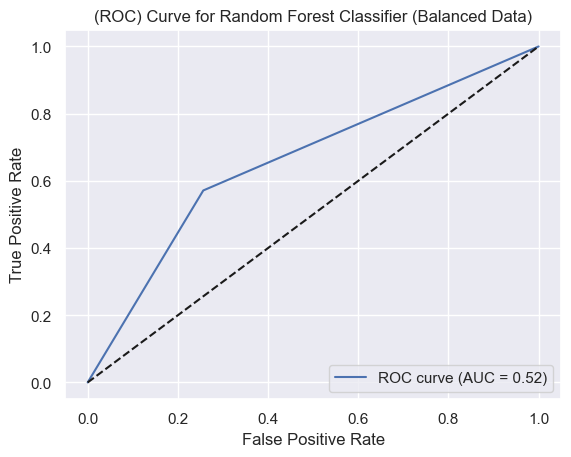

In [104]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % rf_auc_score_b)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Random Forest Classifier (Balanced Data)')
plt.legend(loc='lower right')
plt.show()

In [105]:
rf_train_f1_score_b = calculate_f1_score(rf_model_b, X_train_resampled, y_train_resampled)
rf_eval_f1_score_b = calculate_f1_score(rf_model_b, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set for Random forest with balanced data:", rf_train_f1_score_b)
print("F1 Score on Evaluation Set for Random forest with balanced data:", rf_eval_f1_score_b)


F1 Score on Training Set for Random forest with balanced data: 1.0
F1 Score on Evaluation Set for Random forest with balanced data: 0.6086956521739131


In [106]:
# Call the function with your Naive Bayes model and train data
cv_scores, avg_f1_score = perform_cross_validation(rf_model_b, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores for Random forest with balanced data:", cv_scores)
print("Average F1 Score for Random forest with balanced data:", avg_f1_score)

Cross-Validation Scores for Random forest with balanced data: [0.81889764 0.74796748 0.86821705 0.89051095 0.82706767]
Average F1 Score for Random forest with balanced data: 0.830532157962336


### Balanced Model #004

In [107]:
xgb_model_b, xgb_preds_b, xgb_f1_score_b, fpr_b, tpr_b, thresholds_b, xgb_auc_score_b = xgboost_model(X_train_resampled, y_train_resampled, X_eval_df, y_eval)

# Print the F1 score and AUC score
print("F1 Score on Evaluation for XGBoost with balanced data:", xgb_f1_score_b)
print("AUC Score on Evaluation for XGBoost with balanced data:", xgb_auc_score_b)


F1 Score on Evaluation for XGBoost with balanced data: 0.5977011494252874
AUC Score on Evaluation for XGBoost with balanced data: 0.6877289377289377


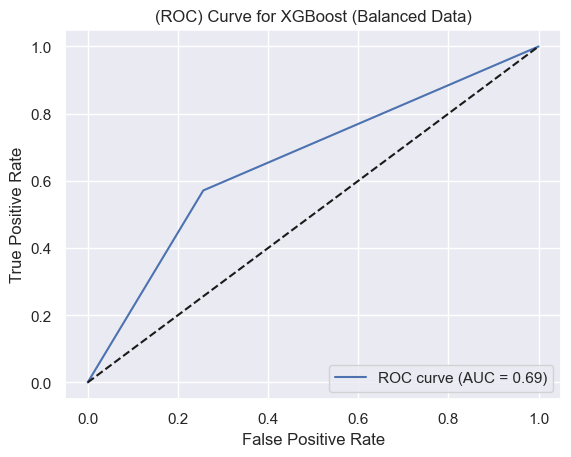

In [108]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % xgb_auc_score_b)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for XGBoost (Balanced Data)')
plt.legend(loc='lower right')
plt.show()

In [109]:
xgb_train_f1_score_b = calculate_f1_score(xgb_model_b, X_train_resampled, y_train_resampled)
xgb_eval_f1_score_b = calculate_f1_score(xgb_model_b, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set for XGBoost with balanced data:", xgb_train_f1_score_b)
print("F1 Score on Evaluation Set for XGBoost with balanced data:", xgb_eval_f1_score_b)


F1 Score on Training Set for XGBoost with balanced data: 1.0
F1 Score on Evaluation Set for XGBoost with balanced data: 0.5977011494252874


In [110]:
# Call the function with your Naive Bayes model and train data
cv_scores, avg_f1_score = perform_cross_validation(xgb_model_b, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores for Random forest with balanced data:", cv_scores)
print("Average F1 Score for Random forest with balanced data:", avg_f1_score)

Cross-Validation Scores for Random forest with balanced data: [0.79032258 0.72868217 0.8372093  0.84892086 0.84057971]
Average F1 Score for Random forest with balanced data: 0.8091429253935317


### Balanced Model #005 - Naive Bayes

In [111]:
nb_model_b, nb_preds_b, nb_f1_score_b, fpr_b, tpr_b, thresholds_b, nb_auc_score_b = naive_bayes_model(X_train_resampled, y_train_resampled, X_eval_df, y_eval)

# Print the F1 score and AUC score
print("F1 Score on Evaluation Set based for Naive Bayes with balanced data:", nb_f1_score_b)
print("AUC Score on Evaluation Set based for Naive Bayes with balanced data:", nb_auc_score_b)


F1 Score on Evaluation Set based for Naive Bayes with balanced data: 0.5714285714285714
AUC Score on Evaluation Set based for Naive Bayes with balanced data: 0.6620879120879121


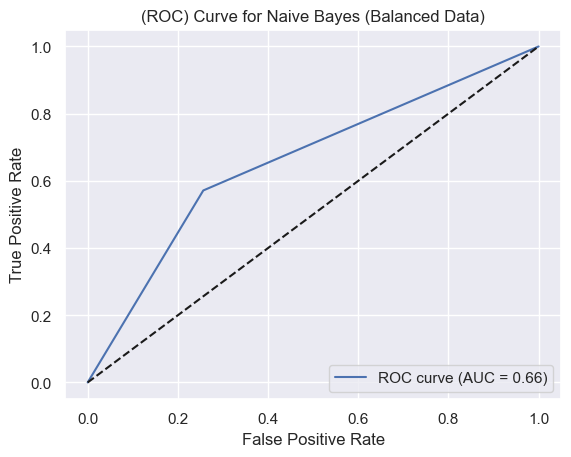

In [112]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % nb_auc_score_b)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Naive Bayes (Balanced Data)')
plt.legend(loc='lower right')
plt.show()

In [113]:
nb_train_f1_score_b = calculate_f1_score(nb_model_b, X_train_resampled, y_train_resampled)
nb_eval_f1_score_b = calculate_f1_score(nb_model_b, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set for Naive Bayes with balanced data:", nb_train_f1_score_b)
print("F1 Score on Evaluation Set for Naive Bayes with balanced data:", nb_eval_f1_score_b)


F1 Score on Training Set for Naive Bayes with balanced data: 0.7343485617597293
F1 Score on Evaluation Set for Naive Bayes with balanced data: 0.5714285714285714


In [114]:
# Call the function with your Naive Bayes model and train data
cv_scores, avg_f1_score = perform_cross_validation(nb_model_b, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores for Random forest with balanced data:", cv_scores)
print("Average F1 Score for Random forest with balanced data:", avg_f1_score)

Cross-Validation Scores for Random forest with balanced data: [0.752      0.704      0.7027027  0.74380165 0.7079646 ]
Average F1 Score for Random forest with balanced data: 0.7220937914730353


### Balanced Model #006 - Stochastic Gradient Decent 

In [115]:
sgd_model_b, sgd_preds_b, sgd_f1_score_b, fpr_b, tpr_b, thresholds_b, sgd_auc_score_b = sgd_model_func(X_train_resampled, y_train_resampled, X_eval_df, y_eval)

# Print the F1 score and AUC score
print("F1 Score on Evaluation Set for SGD with balanced data:", sgd_f1_score_b)
print("AUC Score on Evaluation Set for SGD with balanced data:", sgd_auc_score_b)


F1 Score on Evaluation Set for SGD with balanced data: 0.6470588235294118
AUC Score on Evaluation Set for SGD with balanced data: 0.7197802197802197


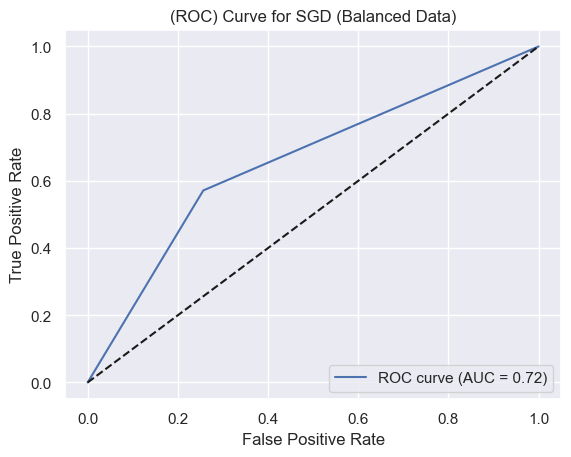

In [116]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % sgd_auc_score_b)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for SGD (Balanced Data)')
plt.legend(loc='lower right')
plt.show()

In [117]:
sgd_train_f1_score_b = calculate_f1_score(sgd_model_b, X_train_resampled, y_train_resampled)
sgd_eval_f1_score_b = calculate_f1_score(sgd_model_b, X_eval_df, y_eval)

# Print the F1 scores
print("F1 Score on Training Set for SGD with balanced data:", sgd_train_f1_score_b)
print("F1 Score on Evaluation Set for SGD with balanced data:", sgd_eval_f1_score_b)


F1 Score on Training Set for SGD with balanced data: 0.7477203647416414
F1 Score on Evaluation Set for SGD with balanced data: 0.6470588235294118


In [118]:
# Call the function with your Naive Bayes model and train data
cv_scores, avg_f1_score = perform_cross_validation(sgd_model_b, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores for SGD with balanced data:", cv_scores)
print("Average F1 Score for SGD with balanced data:", avg_f1_score)

Cross-Validation Scores for SGD with balanced data: [0.67741935 0.49122807 0.63716814 0.73619632 0.68656716]
Average F1 Score for SGD with balanced data: 0.6457158099609156


## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.


In [119]:
results= {'model':['Decision Tree','Random Forest','XGBoost','Logistic Regression','Naive Bayes','SGBoost',
                  'Decision Tree_SMOTE','Random Forest_SMOTE','XGBoost_SMOTE','Logistic Regression_SMOTE','Naive Bayes_SMOTE', 'SGBoost_SMOTE'],
         'f1_score':[dt_f1_score,rf_f1_score,xgb_f1_score,lr_f1_score,nb_f1_score,sgd_f1_score,
                    dt_f1_score_b,rf_f1_score_b,xgb_f1_score_b,lr_f1_score_b,nb_f1_score_b,sgd_f1_score_b],
         'AUC_score':[dt_auc_score,rf_auc_score,xgb_auc_score,lr_auc_score,nb_auc_score,sgd_auc_score,
                     dt_auc_score_b,rf_auc_score_b,xgb_auc_score_b,lr_auc_score_b,nb_auc_score_b, sgd_auc_score_b]}

results_df= pd.DataFrame(results)

In [120]:
results_df.sort_values(by= 'AUC_score', ascending = False)

,model,f1_score,AUC_score
9,Logistic Regression_SMOTE,0.652632,0.728022
11,SGBoost_SMOTE,0.647059,0.719780
3,Logistic Regression,0.626506,0.713370
0,Decision Tree,0.602410,0.695055
6,Decision Tree_SMOTE,0.610526,0.691392
8,XGBoost_SMOTE,0.597701,0.687729
2,XGBoost,0.588235,0.682234
1,Random Forest,0.578313,0.676740
4,Naive Bayes,0.574713,0.669414
10,Naive Bayes_SMOTE,0.571429,0.662088


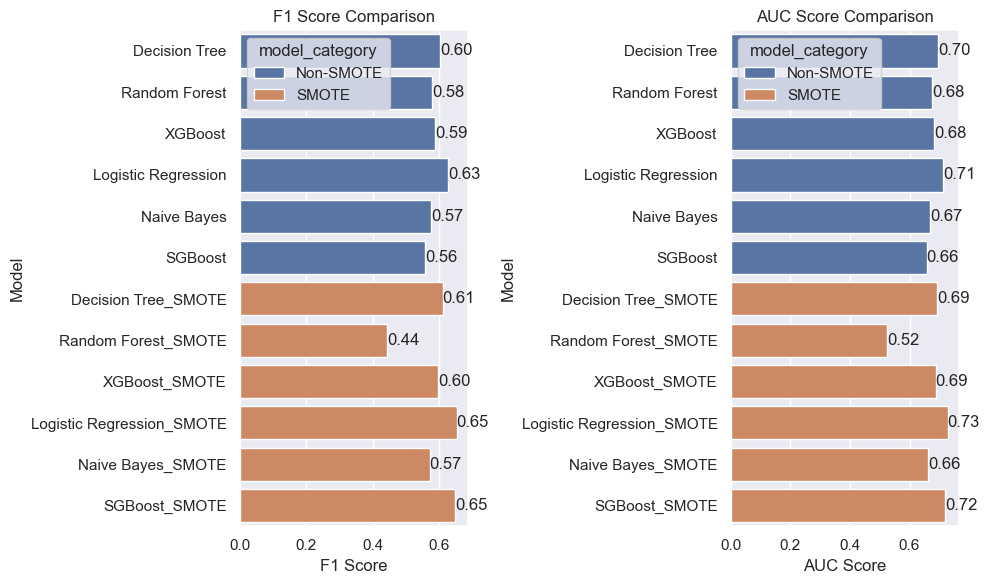

In [121]:
# Filter models with and without SMOTE
models_with_smote = ['Decision Tree_SMOTE', 'Random Forest_SMOTE', 'XGBoost_SMOTE', 'Logistic Regression_SMOTE', 'Naive Bayes_SMOTE', 'SGBoost_SMOTE']
models_without_smote = ['Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression', 'Naive Bayes', 'SGBoost']

# Create separate DataFrames for each comparison
f1_scores_comparison = results_df[results_df['model'].isin(models_without_smote + models_with_smote)][['model', 'f1_score']]
auc_scores_comparison = results_df[results_df['model'].isin(models_without_smote + models_with_smote)][['model', 'AUC_score']]

# Convert model categories to SMOTE and Non-SMOTE
f1_scores_comparison['model_category'] = f1_scores_comparison['model'].apply(lambda x: 'SMOTE' if 'SMOTE' in x else 'Non-SMOTE')
auc_scores_comparison['model_category'] = auc_scores_comparison['model'].apply(lambda x: 'SMOTE' if 'SMOTE' in x else 'Non-SMOTE')

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='f1_score', y='model', data=f1_scores_comparison, hue='model_category')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.title('F1 Score Comparison')

# Add data labels to the bar plot
for i, (value, name) in enumerate(zip(f1_scores_comparison['f1_score'], f1_scores_comparison['model'])):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.subplot(1, 2, 2)
sns.barplot(x='AUC_score', y='model', data=auc_scores_comparison, hue='model_category')
plt.xlabel('AUC Score')
plt.ylabel('Model')
plt.title('AUC Score Comparison')

# Add data labels to the bar plot
for i, (value, name) in enumerate(zip(auc_scores_comparison['AUC_score'], auc_scores_comparison['model'])):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

#### MODEL 1 - Logistic Regression Model

In [122]:
def perform_lr_grid_search(X, y):
    # Define the hyperparameters grid
    param_grid = {
        'C': [10, 30, 50, 70, 80, 100],  # Inverse of regularization strength
        'penalty': ['l1', 'l2'],  # Regularization penalty
        'solver': ['liblinear', 'saga'],  # Solver algorithm for optimization
        'max_iter': [10, 20, 30, 40, 50]  # Maximum number of iterations
    }

    # Define scoring metrics
    scoring = {
        'F1': 'f1',
        'ROC AUC': 'roc_auc'
    }

    # Perform grid search to find the best hyperparameters
    lr_model = LogisticRegression()
    lr_grid_search = GridSearchCV(lr_model, param_grid, scoring=scoring, cv=5, refit='F1')
    lr_grid_search.fit(X, y)

    # Create a dictionary to store the results
    results = {
        'best_params': lr_grid_search.best_params_,
        'best_estimator': lr_grid_search.best_estimator_,
        'best_f1_score': lr_grid_search.best_score_,
        'best_roc_auc_score': roc_auc_score(y, lr_grid_search.predict_proba(X)[:, 1])
    }

    # Return the results
    return results

In [123]:
# Call the function and store the results
lr_results = perform_lr_grid_search(X_train_df, y_train)

# Access the desired parameters from the results dictionary
lr_best_params_h = lr_results['best_params']
lr_best_estimator_h = lr_results['best_estimator']
lr_best_f1_score_h = lr_results['best_f1_score']
lr_best_roc_auc_score_h = lr_results['best_roc_auc_score']

# Print the desired parameters
print("Best hyperparameters: ", lr_best_params_h)
print('Best estimator: ', lr_best_estimator_h)
print("Best F1 score: ", lr_best_f1_score_h)
print("Best ROC AUC score: ", lr_best_roc_auc_score_h)


Best hyperparameters:  {'C': 10, 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator:  LogisticRegression(C=10, max_iter=10, solver='liblinear')
Best F1 score:  0.6482967000682496
Best ROC AUC score:  0.8388121174795028


##### Checking for overfitting

In [124]:
# Call the function with your logistic regression model and train data
cv_scores, avg_f1_score = perform_cross_validation(lr_best_estimator_h, X_train_df, y_train, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)


Cross-Validation Scores: [0.6557377  0.66666667 0.65384615 0.55555556 0.70967742]
Average F1 Score: 0.6482967000682496


In [125]:
# Perform the grid search
lr_results_h_b = perform_lr_grid_search(X_train_resampled, y_train_resampled)

# Access the desired parameters from the results dictionary
lr_best_params_h_b = lr_results_h_b['best_params']
lr_best_estimator_h_b = lr_results_h_b['best_estimator']
lr_best_f1_score_h_b = lr_results_h_b['best_f1_score']
lr_best_roc_auc_score_h_b = lr_results_h_b['best_roc_auc_score']

# Print the desired parameters
print("Best hyperparameters: ", lr_best_params_h_b)
print('Best estimator: ', lr_best_estimator_h_b)
print("Best F1 score: ", lr_best_f1_score_h_b)
print("Best ROC AUC score: ", lr_best_roc_auc_score_h_b)


Best hyperparameters:  {'C': 10, 'max_iter': 10, 'penalty': 'l2', 'solver': 'saga'}
Best estimator:  LogisticRegression(C=10, max_iter=10, solver='saga')
Best F1 score:  0.7431523864572701
Best ROC AUC score:  0.8444303810389


##### Checking for overfitting

In [126]:
# Call the function with your logistic regression model and train data
cv_scores, avg_f1_score = perform_cross_validation(lr_best_estimator_h_b, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)


Cross-Validation Scores: [0.74418605 0.70967742 0.74336283 0.77419355 0.73770492]
Average F1 Score: 0.7418249528289516


#### MODEL 2 - Decision Tree Model

In [127]:
def perform_dt_grid_search(X, y):
    # Define the hyperparameters grid
    param_grid = {
        'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 5],  # Minimum number of samples required to be at a leaf node
        'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
    }

    # Define scoring metrics
    scoring = {
        'F1': 'f1',
        'ROC AUC': 'roc_auc'
    }

    # Perform grid search to find the best hyperparameters
    dt_model = DecisionTreeClassifier()
    dt_grid_search = GridSearchCV(dt_model, param_grid, scoring=scoring, cv=5, refit='F1')
    dt_grid_search.fit(X, y)

    # Create a dictionary to store the results
    results = {
        'best_params': dt_grid_search.best_params_,
        'best_estimator': dt_grid_search.best_estimator_,
        'best_f1_score': dt_grid_search.best_score_,
        'best_roc_auc_score': roc_auc_score(y, dt_grid_search.predict_proba(X)[:, 1])
    }

    # Return the results
    return results


In [128]:
# Call the function and store the results
dt_results_h = perform_dt_grid_search(X_train_df, y_train)

# Access the desired parameters from the results dictionary
dt_best_params_h = dt_results_h['best_params']
dt_best_estimator_h = dt_results_h['best_estimator']
dt_best_f1_score_h = dt_results_h['best_f1_score']
dt_best_roc_auc_score_h = dt_results_h['best_roc_auc_score']

# Print the desired parameters
print("Best hyperparameters: ", dt_best_params_h)
print('Best estimator: ', dt_best_estimator_h)
print("Best F1 score: ", dt_best_f1_score_h)
print("Best ROC AUC score: ", dt_best_roc_auc_score_h)


Best hyperparameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator:  DecisionTreeClassifier(max_depth=5, max_features='log2')
Best F1 score:  0.6495013155290887
Best ROC AUC score:  0.9048077293198353


##### Checking for overfitting

In [129]:
# Call the function with your logistic regression model and train data
cv_scores, avg_f1_score = perform_cross_validation(dt_best_estimator_h, X_train_df, y_train, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)


Cross-Validation Scores: [0.63157895 0.56140351 0.65671642 0.5        0.2962963 ]
Average F1 Score: 0.5291990340694189


In [130]:
# Call the function and store the results
dt_results_h_b = perform_dt_grid_search(X_train_resampled, y_train_resampled)

# Access the desired parameters from the results dictionary
dt_best_params_h_b = dt_results_h_b['best_params']
dt_best_estimator_h_b = dt_results_h_b['best_estimator']
dt_best_f1_score_h_b = dt_results_h_b['best_f1_score']
dt_best_roc_auc_score_h_b = dt_results_h_b['best_roc_auc_score']

# Print the desired parameters
print("Best hyperparameters: ", dt_best_params_h_b)
print('Best estimator: ', dt_best_estimator_h_b)
print("Best F1 score: ", dt_best_f1_score_h_b)
print("Best ROC AUC score: ", dt_best_roc_auc_score_h_b)

Best hyperparameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best estimator:  DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_split=5)
Best F1 score:  0.776022352044704
Best ROC AUC score:  0.8589604875011483


##### Checking for overfitting

In [131]:
# Call the function with your logistic regression model and train data
cv_scores, avg_f1_score = perform_cross_validation(dt_best_estimator_h_b, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)

Cross-Validation Scores: [0.7008547  0.66666667 0.79365079 0.81818182 0.77165354]
Average F1 Score: 0.7502015045322132


##### MODEL 3 - XGboost Model

In [132]:
def perform_xgb_grid_search(X, y):
    # Define the hyperparameters grid
    param_grid = {
        'max_depth': [3, 5, 7],  # Maximum depth of the tree
        'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
        'n_estimators': [100, 200, 300],  # Number of trees (estimators)
        'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
        'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
    }

    # Define scoring metrics
    scoring = {
        'F1': 'f1',
        'ROC AUC': 'roc_auc'
    }

    # Perform grid search to find the best hyperparameters
    xgb_model = XGBClassifier()
    xgb_grid_search = GridSearchCV(xgb_model, param_grid, scoring=scoring, cv=5, refit='F1')
    xgb_grid_search.fit(X, y)

    # Create a dictionary to store the results
    results = {
        'best_params': xgb_grid_search.best_params_,
        'best_estimator': xgb_grid_search.best_estimator_,
        'best_f1_score': xgb_grid_search.best_score_,
        'best_roc_auc_score': roc_auc_score(y, xgb_grid_search.predict_proba(X)[:, 1])
    }

    # Return the results
    return results


In [133]:
# Call the function and store the results
xgb_results_h = perform_xgb_grid_search(X_train_df, y_train)

# Access the desired parameters from the results dictionary
xgb_best_params_h = xgb_results_h['best_params']
xgb_best_estimator_h = xgb_results_h['best_estimator']
xgb_best_f1_score_h = xgb_results_h['best_f1_score']
xgb_best_roc_auc_score_h = xgb_results_h['best_roc_auc_score']

# Print the desired parameters
print("Best hyperparameters: ", xgb_best_params_h)
print('Best estimator: ', xgb_best_estimator_h)
print("Best F1 score: ", xgb_best_f1_score_h)
print("Best ROC AUC score: ", xgb_best_roc_auc_score_h)


Best hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best F1 score:  0.6461201298701299
Best ROC AUC score:  0.9972670233650256


In [134]:
# Call the function with your logistic regression model and train data
cv_scores, avg_f1_score = perform_cross_validation(xgb_best_estimator_h, X_train, y_train, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)

Cross-Validation Scores: [0.6875     0.68571429 0.56666667 0.59375    0.6969697 ]
Average F1 Score: 0.6461201298701299


In [135]:
# Call the function and store the results
xgb_results_h_b = perform_xgb_grid_search(X_train_resampled, y_train_resampled)

# Access the desired parameters from the results dictionary
xgb_best_params_h_b = xgb_results_h_b['best_params']
xgb_best_estimator_h_b = xgb_results_h_b['best_estimator']
xgb_best_f1_score_h_b = xgb_results_h_b['best_f1_score']
xgb_best_roc_auc_score_h_b = xgb_results_h_b['best_roc_auc_score']

# Print the desired parameters
print("Best hyperparameters: ", xgb_best_params_h_b)
print('Best estimator: ', xgb_best_estimator_h_b)
print("Best F1 score: ", xgb_best_f1_score_h_b)
print("Best ROC AUC score: ", xgb_best_roc_auc_score_h_b)


Best hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best F1 score:  0.8225748062863651
Best ROC AUC score:  0.9999081342057181


##### Checking for overfitting

In [136]:
# Call the function with your logistic regression model and train data
cv_scores, avg_f1_score = perform_cross_validation(xgb_best_estimator_h_b, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Print the cross-validation scores and average F1 score
print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)

Cross-Validation Scores: [0.79674797 0.73015873 0.85714286 0.86956522 0.85925926]
Average F1 Score: 0.8225748062863651


### Hyperparameter tuning results comparison 

In [137]:
results_hyper= {'model':['Logistic_Regression','Logistic_Regression_SMOTE','Decision_Tree','Decision_Tree_SMOTE', 'XGBoost', 'XGBoost_SMOTE'],
         'f1_score':[lr_best_f1_score_h,lr_best_f1_score_h_b,dt_best_f1_score_h,dt_best_f1_score_h_b,
                    xgb_best_f1_score_h,xgb_best_f1_score_h_b],
         'AUC_score':[lr_best_roc_auc_score_h, lr_best_roc_auc_score_h_b,dt_best_roc_auc_score_h, dt_best_roc_auc_score_h_b,
                     xgb_best_roc_auc_score_h, xgb_best_roc_auc_score_h_b,]}

results_hyper_df= pd.DataFrame(results_hyper)

results_hyper_df.sort_values(by= 'AUC_score', ascending = False)

,model,f1_score,AUC_score
5,XGBoost_SMOTE,0.822575,0.999908
4,XGBoost,0.646120,0.997267
2,Decision_Tree,0.649501,0.904808
3,Decision_Tree_SMOTE,0.776022,0.858960
1,Logistic_Regression_SMOTE,0.743152,0.844430
0,Logistic_Regression,0.648297,0.838812


In [138]:
best_model_final = results_hyper_df.loc[results_hyper_df['AUC_score'].idxmax(), 'model']
best_model_final

'XGBoost_SMOTE'

### Confusion Matrix for Best model -- Logistic Regression 

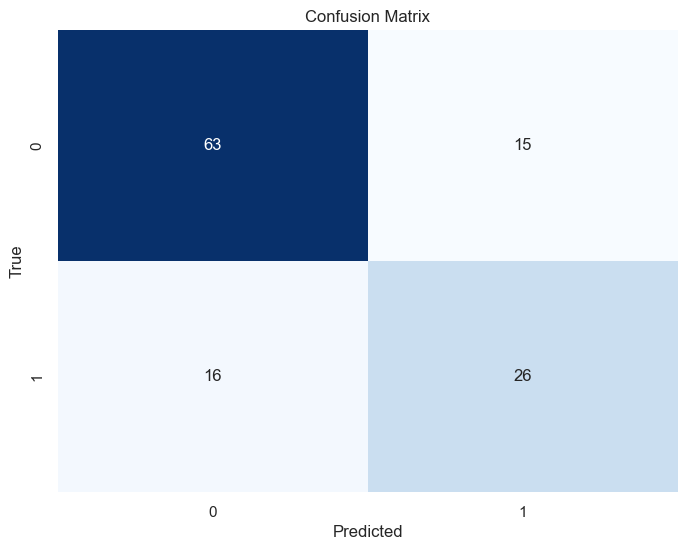

In [139]:
# Calculate confusion matrix
cm = confusion_matrix(y_eval, lr_preds)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Predictions on the test data

In [140]:
# Make predictions on the test data
lr_test_preds = lr_model.predict(X_test)

# Print the predictions
print(lr_test_preds)

[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0]


#### MODEL EXPLAINABILITY 

In [141]:
# Create a Shap explainer object
explainer = shap.Explainer(lr_model, X_train)

# Calculate Shapely values
shap_values = explainer(X_eval_df)


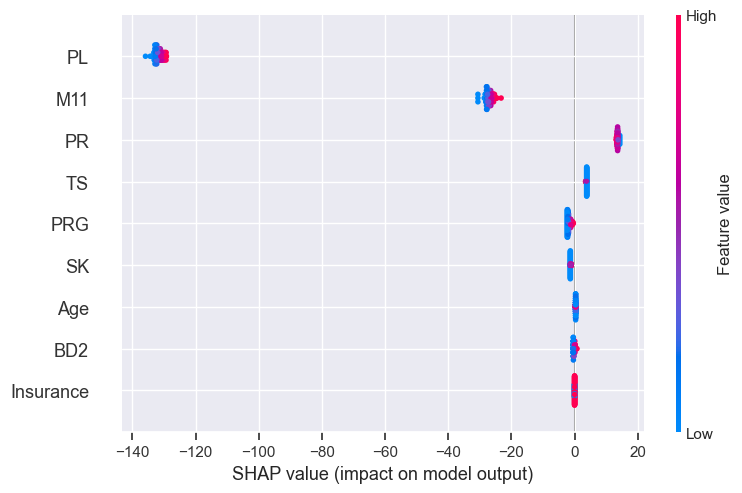

In [142]:
# Create an Explanation object from Shapely values
shap_explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_eval_df)

# Force plot for a specific instance
shap.force_plot(shap_explanation.base_values, shap_explanation.values[0], X_eval_df.iloc[0])

# Other plots using the Explanation object
shap.summary_plot(shap_explanation, X_eval_df)


The summary plot displays a horizontal bar chart that represents the mean magnitude of the Shapley values for each feature in the dataset. The bars are sorted in descending order, with the most impactful features on the top. The length of each bar represents the average absolute impact of the corresponding feature on the model's output. This shows that attribute PL has the most impact and Insurance has the least impact 

The color of each bar indicates the direction of the feature's impact. Positive values are shown in red, indicating that higher feature values contribute to higher predictions, while negative values are shown in blue, indicating the opposite effect.


# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [143]:
# Get the current working directory
cwd = os.getcwd()

# Specify the relative path to the destination directory
destination = os.path.join(cwd, "Models")

# Create the "export" directory if it doesn't exist
os.makedirs(destination, exist_ok=True)

# Export the numerical imputer
imputer_filepath = os.path.join(destination, "numerical_imputer.joblib")
dump(numerical_imputer, imputer_filepath)

# Export the scaler
scaler_filepath = os.path.join(destination, "scaler.joblib")
dump(scaler, scaler_filepath)

# Export the logistic regression model
model_filepath = os.path.join(destination, "lr_model.joblib")
dump(lr_model, model_filepath)

# Print the paths to the exported components
print(f"Numerical Imputer exported to: {imputer_filepath}")
print(f"Scaler exported to: {scaler_filepath}")
print(f"Logistic Regression Model exported to: {model_filepath}")


Numerical Imputer exported to: c:\Users\HP SPECTRE\OneDrive\Desktop\MYGIT\Sepsis-Prediction-API-using-Fast-API\Notebooks\Models\numerical_imputer.joblib
Scaler exported to: c:\Users\HP SPECTRE\OneDrive\Desktop\MYGIT\Sepsis-Prediction-API-using-Fast-API\Notebooks\Models\scaler.joblib
Logistic Regression Model exported to: c:\Users\HP SPECTRE\OneDrive\Desktop\MYGIT\Sepsis-Prediction-API-using-Fast-API\Notebooks\Models\lr_model.joblib


In [ ]:
!pip list --format=freeze >Assets/requirements.txt